#### Student name: Ian Macharia
#### Student pace: full time
#### Scheduled project review date/time: Wednesday,24th May, 2023
#### Instructor name: Nikita Njoroge
#### Blog post URL:

## Business Understanding

### Overview of the Project and its Goals:

The goal of this project is to develop a credit card default prediction model using a given dataset. The dataset contains information about credit card clients, including their demographics, credit history, bill statements, and payment records. By analyzing this data, we aim to build a predictive model that can accurately predict whether a credit card client will default on their payment or not.

### Problem Statement and Importance of Credit Card Default Prediction:

The problem statement revolves around predicting credit card default, which refers to the failure of a borrower to make timely payments on their credit card. Credit card default prediction is crucial for financial institutions, such as banks and credit card companies, as it helps them assess the creditworthiness and risk profile of their clients. By accurately predicting credit card default, financial institutions can take proactive measures to mitigate potential risks and make informed decisions regarding credit approvals, setting credit limits, and debt collection strategies.

## Data Understanding

### Importing relevant packages
The packages we use are the built upon base Python language. They include: Numpy Package for mathematical analysis if we will need Pandas package - which will be used for cleaning and subsetting the data into dataframe Matplotlib package for some basic visualization Seaborn package for more detailed visualizations and clearer visualizations. It is common practice to import the packages using their aliases rather than having to call their full names.
For modelling and prediction we will employ the use of Scikit-Learn that contains several packages for performing regression analysis as well as classification.  

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from myfunctions import read_data, clean_data, ClassificationEvaluator

# Reading dataset
The data is provided by:
Yeh,I-Cheng. (2016). default of credit card clients. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

The data attributes are as follows:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

> X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

> X2: Gender (1 = male; 2 = female).

> X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

> X4: Marital status (1 = married; 2 = single; 3 = others).

> X5: Age (year).

> X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    >> `X6` = the repayment status in September, 2005; `X7` = the repayment status in August, 2005; . . .;`X11` = the repayment status in April, 2005. 
    
   >> The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

> X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

> X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [231]:
data = read_data()
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [232]:
# Summary of the dataset
# Getting the shape of the dataset
print("The shape of the data is:", data.shape)
print()
# Checking the data types and a deeper look into the column names
print("Information about the dataset:")
print(data.info())


The shape of the data is: (30001, 24)

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30001 non-null  object
 1   X2      30001 non-null  object
 2   X3      30001 non-null  object
 3   X4      30001 non-null  object
 4   X5      30001 non-null  object
 5   X6      30001 non-null  object
 6   X7      30001 non-null  object
 7   X8      30001 non-null  object
 8   X9      30001 non-null  object
 9   X10     30001 non-null  object
 10  X11     30001 non-null  object
 11  X12     30001 non-null  object
 12  X13     30001 non-null  object
 13  X14     30001 non-null  object
 14  X15     30001 non-null  object
 15  X16     30001 non-null  object
 16  X17     30001 non-null  object
 17  X18     30001 non-null  object
 18  X19     30001 non-null  object
 19  X20     30001 non-null  object
 20  X21     30001 non-null  obje

We notice that the data columns are in the second row, we will need to change that from the current that has the 'X' values
Next we will need to check on the contents of the data; specifically, whether or not there are missing values, and if they are in the right data type.
We observe that the data does not contain null values, From the data description, we observe that they collected the data as values rather than the actual observation. we will also have to convert them to categorical for the columns: `Marriage`, `Sex`, `Education`. To do this we will just replace the values within the dataset to the actual recorded values used by the data collection tool. this will also affect the columns containing the payment status, i.e. columns `Pay_0 - pay_6`

In [233]:
clean_df = clean_data(data)

In [234]:
clean_df.head(10)

ID,Limit_bal,Sex,Education,Marriage,Age,Pay_status_Apr,Pay_status_May,Pay_Status_Jun,Pay_Status_Jul,Pay_Status_Aug,...,Bill_amt_Jul,Bill_amt_Aug,Bill_amt_Sept,Paid_amt_Apr,Paid_amt_May,Paid_amt_Jun,Paid_amt_Jul,Paid_amt_Aug,Paid_amt_Sept,Target
1,20000,Female,University,Married,24,Watch,Watch,Performing,Performing,Defaulter,...,0,0,0,0,689,0,0,0,0,1
2,120000,Female,University,Single,26,Performing,Watch,Performing,Performing,Performing,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,Female,University,Single,34,Performing,Performing,Performing,Performing,Performing,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,Female,University,Married,37,Performing,Performing,Performing,Performing,Performing,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,Male,University,Married,57,Performing,Performing,Performing,Performing,Performing,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,Male,Graduate School,Single,37,Performing,Performing,Performing,Performing,Performing,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,Male,Graduate School,Single,29,Performing,Performing,Performing,Performing,Performing,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,Female,University,Single,23,Performing,Performing,Performing,Performing,Performing,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,Female,High School,Married,28,Performing,Performing,Watch,Performing,Performing,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,Male,High School,Single,35,Defaulter,Defaulter,Defaulter,Defaulter,Performing,...,0,13007,13912,0,0,0,13007,1122,0,0


In [235]:
# Create bins for the age column
bins = [20, 30, 40, 50, 60, 70, 80]
names = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
clean_df['Age_bin'] = pd.cut(x=clean_df.Age, bins=bins, labels=names, right=True)


In [236]:
# Summary of the dataset
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Limit_bal        29965 non-null  int64   
 1   Sex              29965 non-null  category
 2   Education        29965 non-null  object  
 3   Marriage         29965 non-null  object  
 4   Age              29965 non-null  int64   
 5   Pay_status_Apr   29965 non-null  object  
 6   Pay_status_May   29965 non-null  object  
 7   Pay_Status_Jun   29965 non-null  object  
 8   Pay_Status_Jul   29965 non-null  object  
 9   Pay_Status_Aug   29965 non-null  object  
 10  Pay_Status_Sept  29965 non-null  object  
 11  Bill_amt_Apr     29965 non-null  int64   
 12  Bill_amt_May     29965 non-null  int64   
 13  Bill_amt_Jun     29965 non-null  int64   
 14  Bill_amt_Jul     29965 non-null  int64   
 15  Bill_amt_Aug     29965 non-null  int64   
 16  Bill_amt_Sept    29965 non-null  int64   
 17

In [237]:

# the data presented additional duplicates
# this was after they had ben dropped in the initial data
# by the cleaning function
clean_df.drop_duplicates(inplace=True)
# confirmation they are no longer present
print(clean_df.duplicated().sum())

0


## Exploratory Data Analysis (EDA)

#### Checking for Outliers
After rigourous data clean up, we the try and fine tune the data for ploting, visualization and subsequent modelling.
we will begin by checking for possible outliers

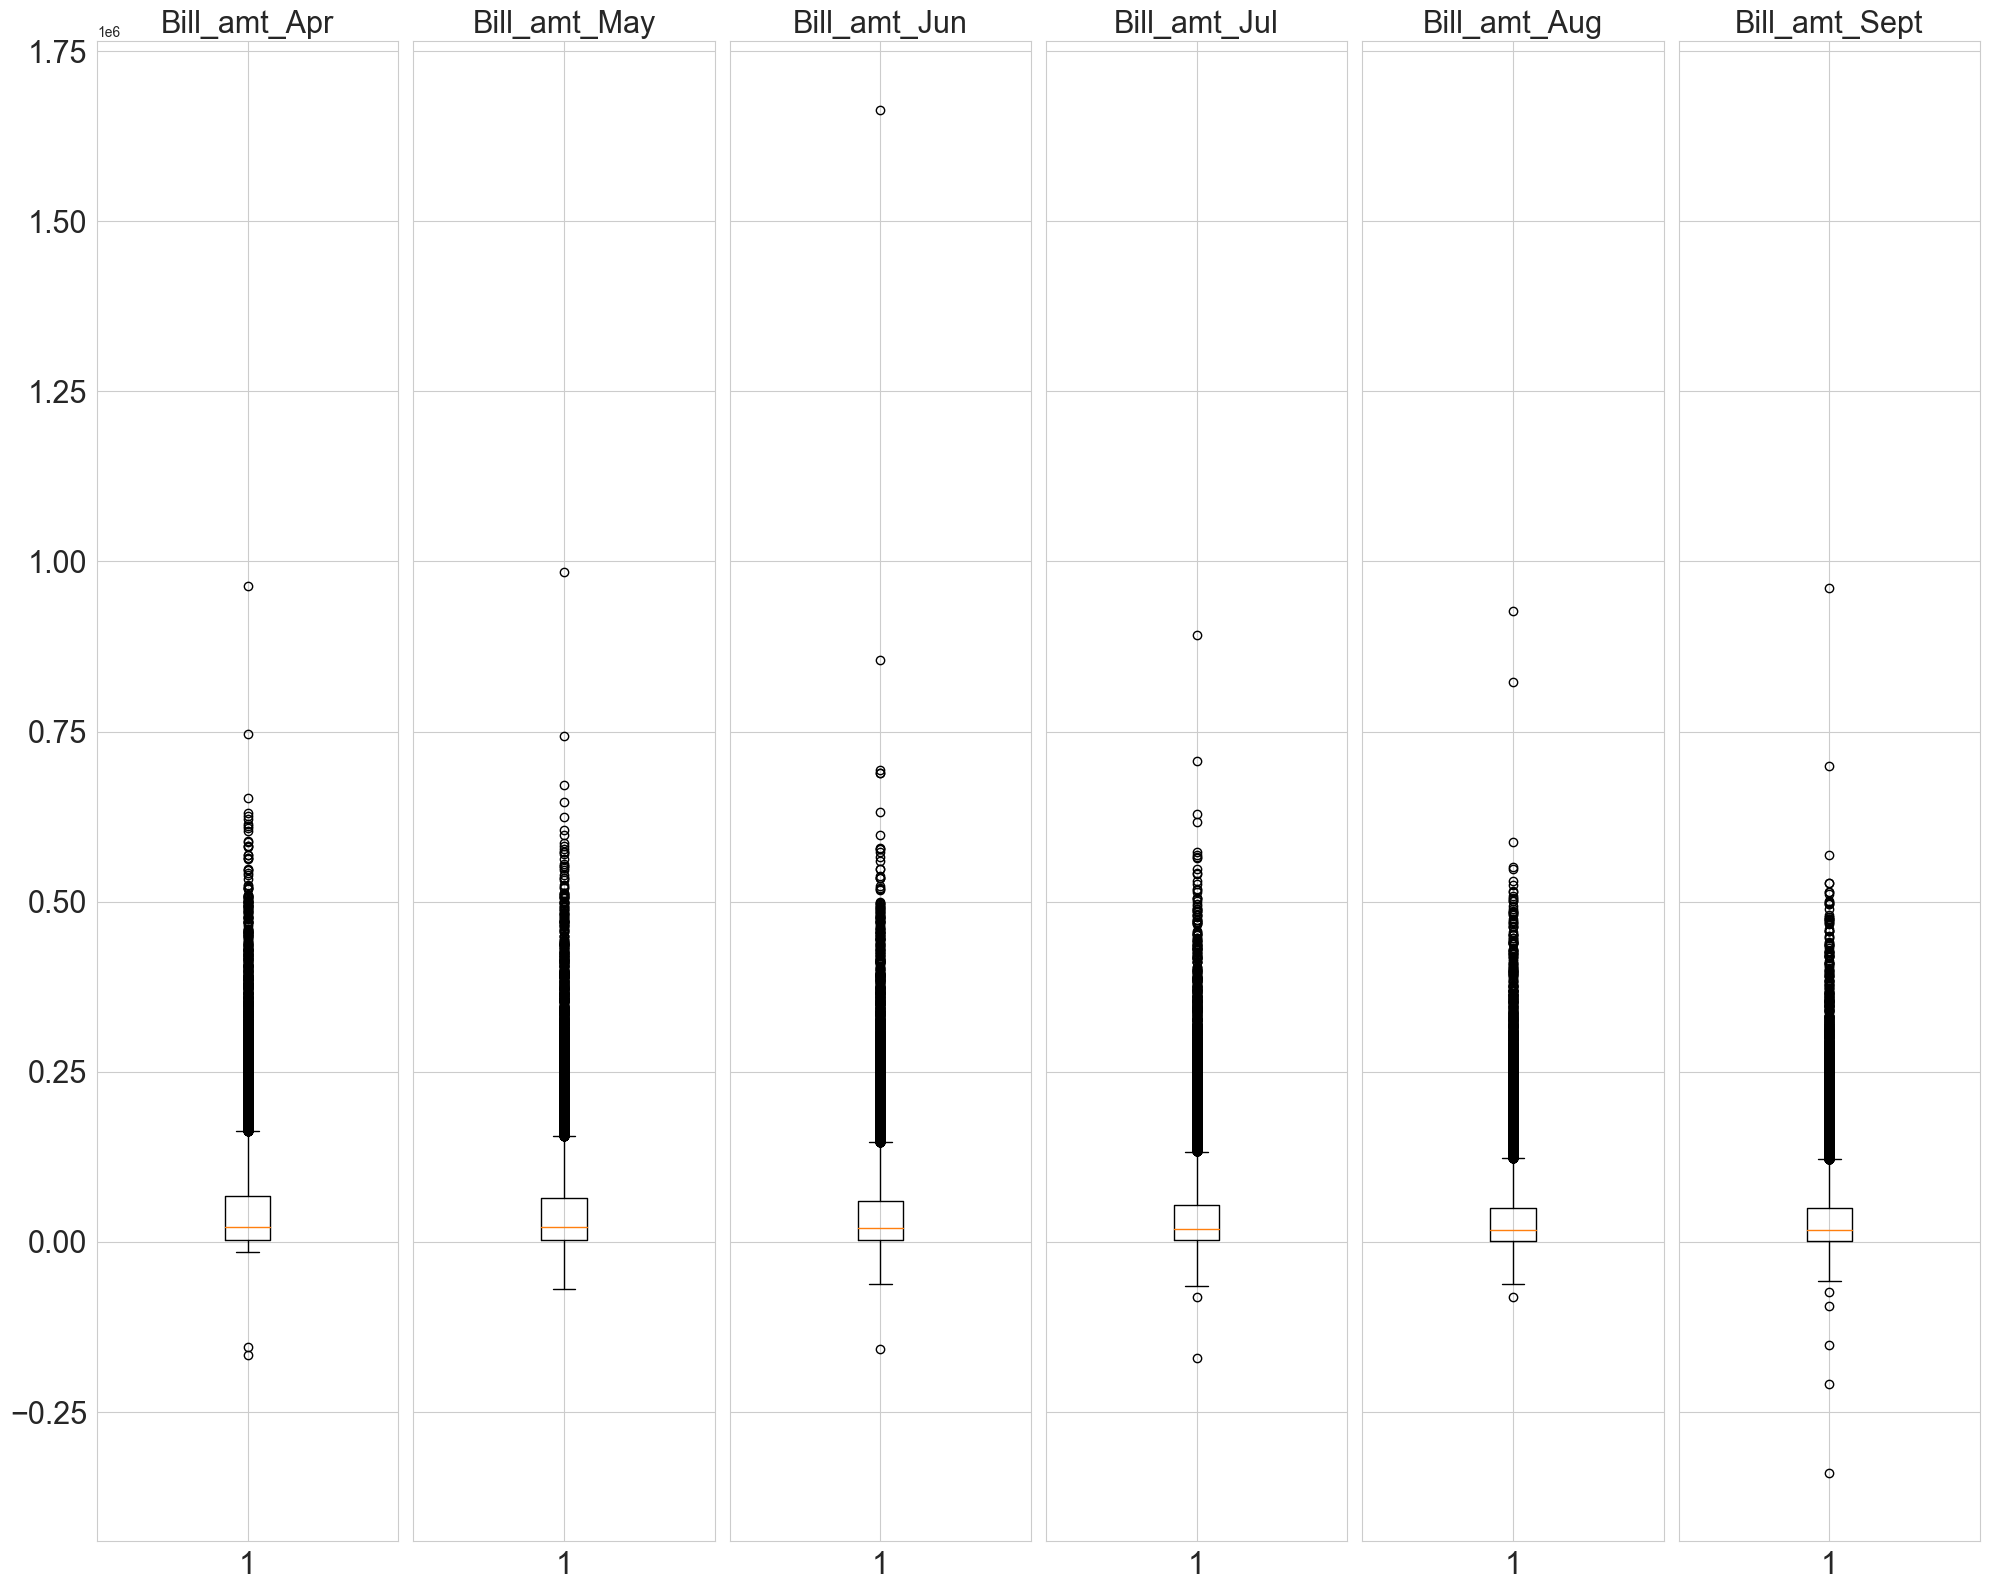

In [238]:
# Select the variables you want to plot

bill_cols_to_plot = ['Bill_amt_Apr', 'Bill_amt_May', 'Bill_amt_Jun','Bill_amt_Jul', 'Bill_amt_Aug', 'Bill_amt_Sept']
########paid_cols_to_plot = clean_df[['Paid_amt_Apr','Paid_amt_May', 'Paid_amt_Jun', 'Paid_amt_Jul', 'Paid_amt_Aug','Paid_amt_Sept']]
######## Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(bill_cols_to_plot), figsize=(20, 16), sharey=True)

####### Create a boxplot for each variable in a separate subplot
for i, col in enumerate(bill_cols_to_plot):
    axes[i].boxplot(clean_df[col])
    axes[i].set_title(col, fontsize=22)
    axes[i].tick_params(axis='both', which='major', labelsize=22)

# Adjust spacing between subplots
plt.tight_layout()
# save te figure
plt.savefig("images/Outliers_1")
# Show the figure
plt.show()


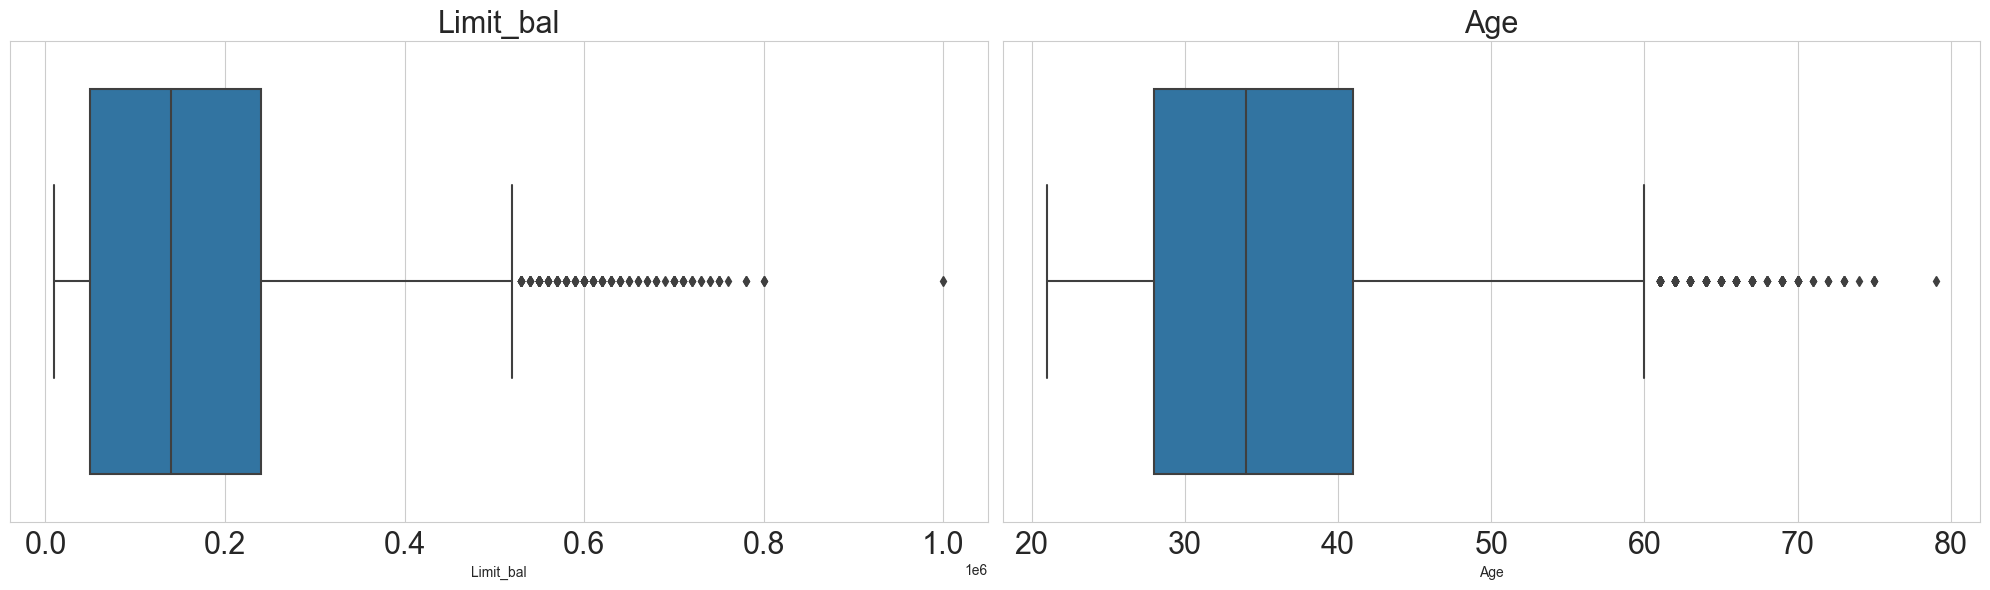

In [239]:


# Select the variables you want to plot
cols_to_plot = ['Limit_bal', 'Age']

# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(20, 6), sharey=True)

# Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    sns.boxplot(x=clean_df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=22)
    axes[i].tick_params(axis='both', which='major', labelsize=22)

# Adjust spacing between subplots
plt.tight_layout()
# save te figure
plt.savefig("images/Outliers_2")
# Show plot
plt.show()


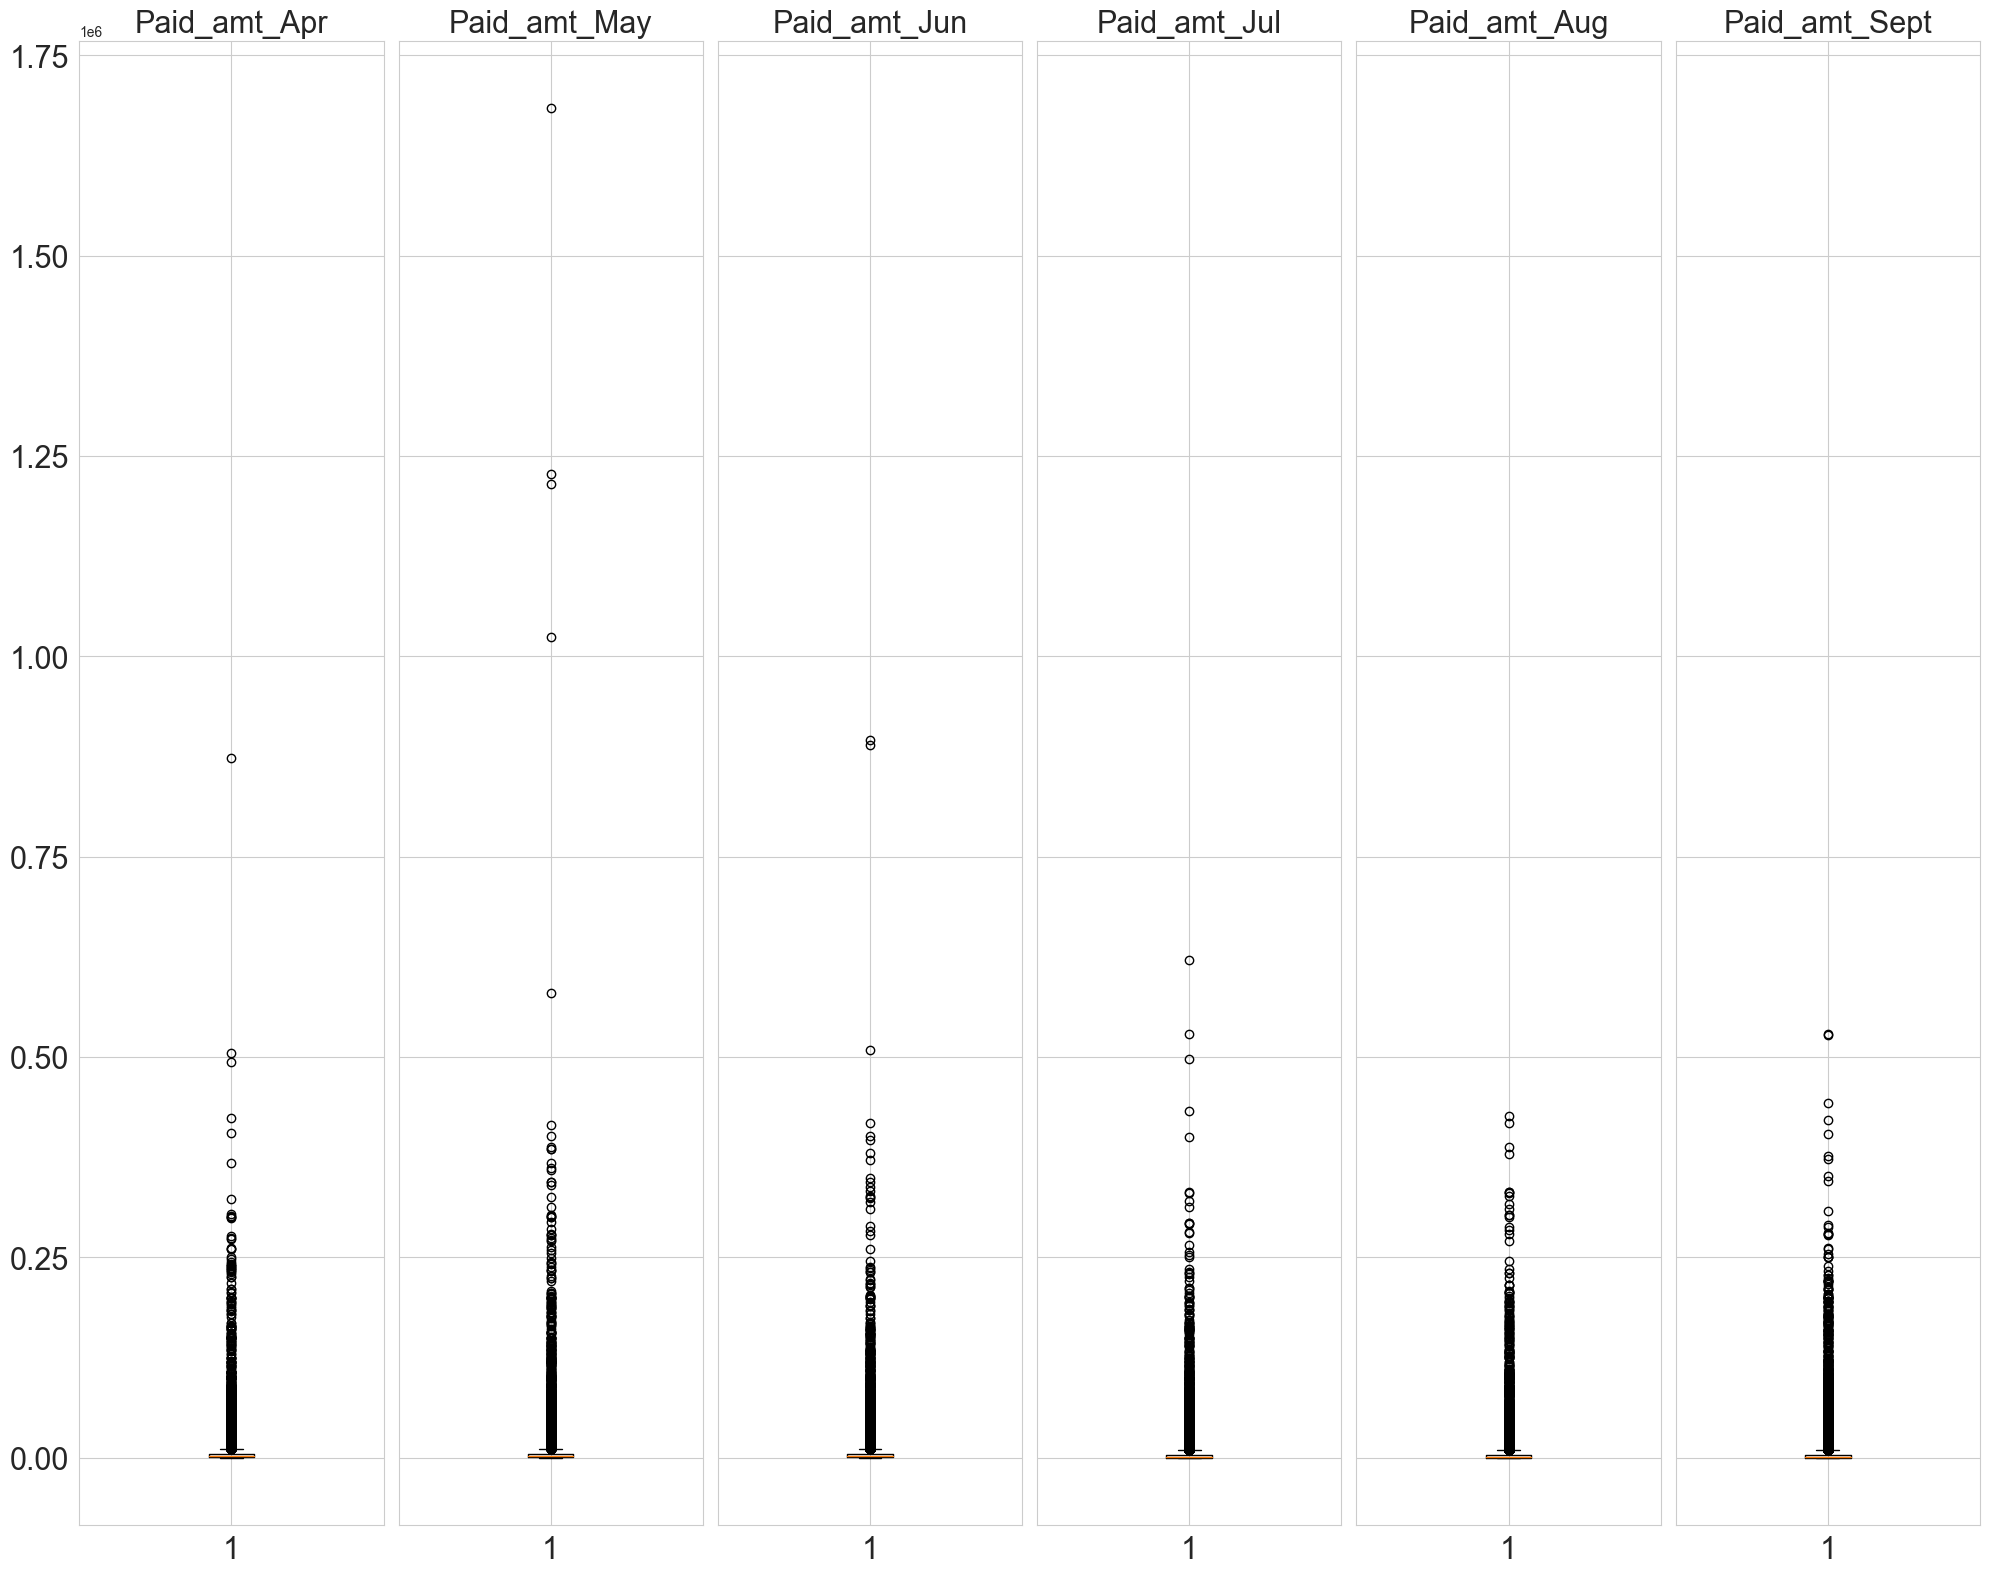

In [240]:
# Select the variables you want to plot
paid_cols_to_plot = clean_df[['Paid_amt_Apr','Paid_amt_May', 'Paid_amt_Jun', 'Paid_amt_Jul', 'Paid_amt_Aug','Paid_amt_Sept']]
# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(bill_cols_to_plot), figsize=(20, 16), sharey=True)

# Create a boxplot for each variable in a separate subplot
for i, col in enumerate(paid_cols_to_plot):
    axes[i].boxplot(clean_df[col])
    axes[i].set_title(col, fontsize=22)
    axes[i].tick_params(axis='both', which='major', labelsize=22)

# Adjust spacing between subplots
plt.tight_layout()
# save the figure
plt.savefig("images/Outliers_3")
# Show the figure
plt.show()

From the graphs we observe that the data is filled with outliers, but considering that they represent different clients, it provides a diversity that will be an effective representations of the whole population. We will instead normalize and standardize the data to have them in a normal distribution.

Histogram plots can be used to visualize the distribution of each variable in the dataset. Histograms provide insights into the data's frequency distribution, central tendency, and spread.

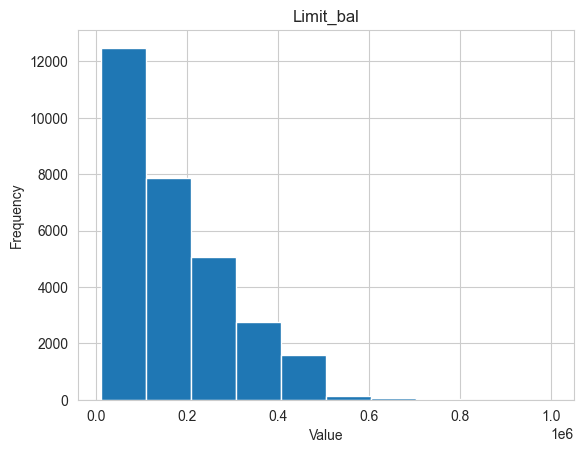

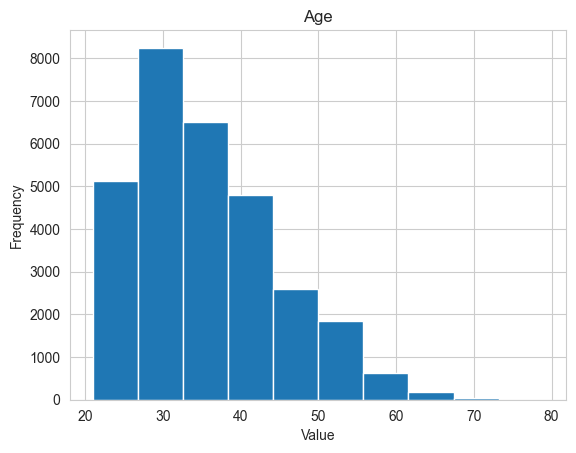

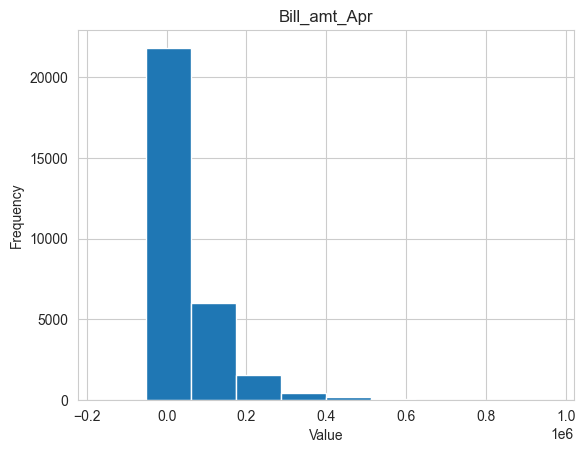

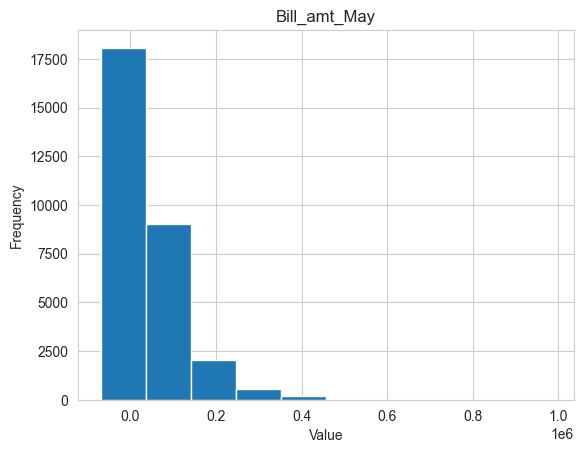

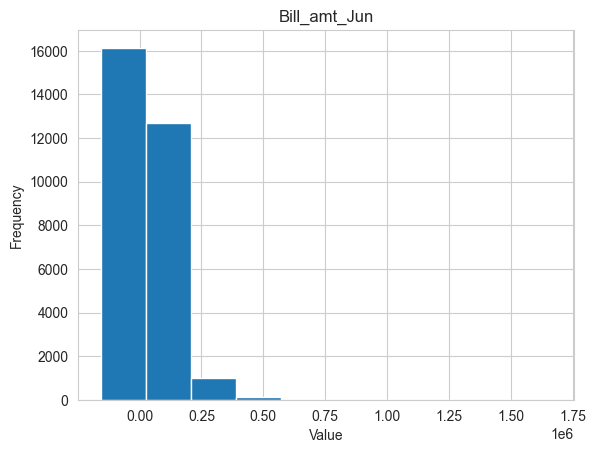

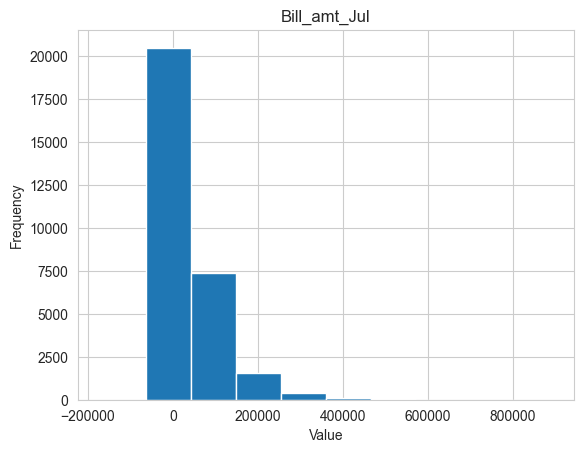

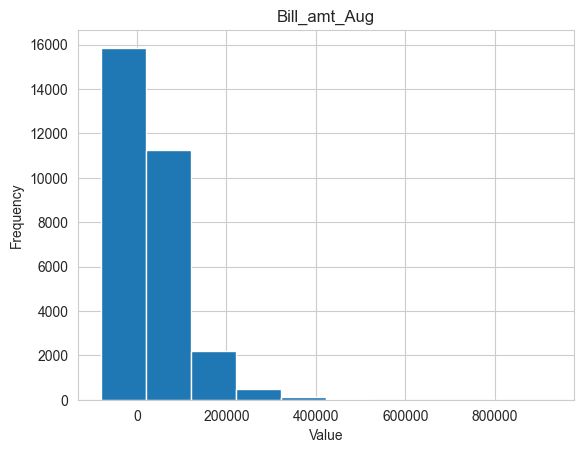

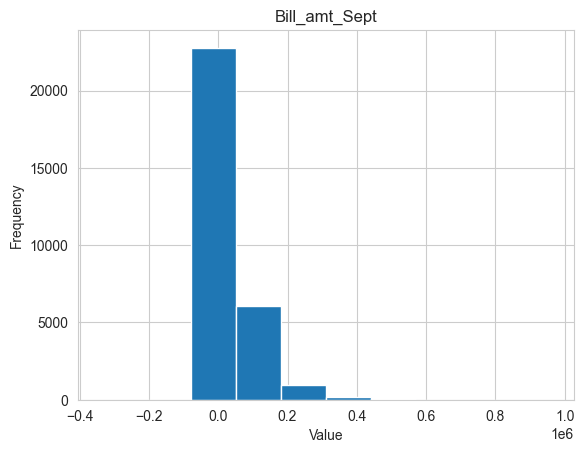

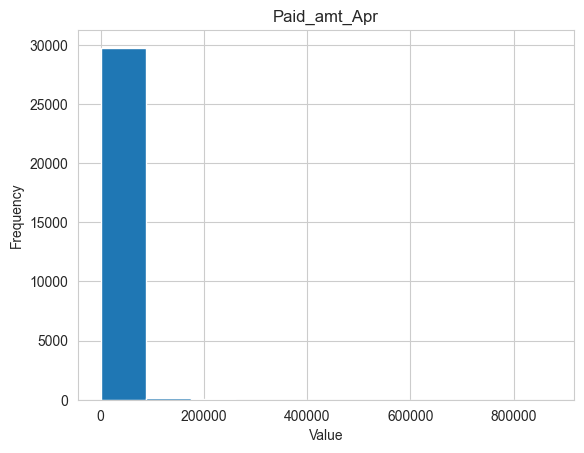

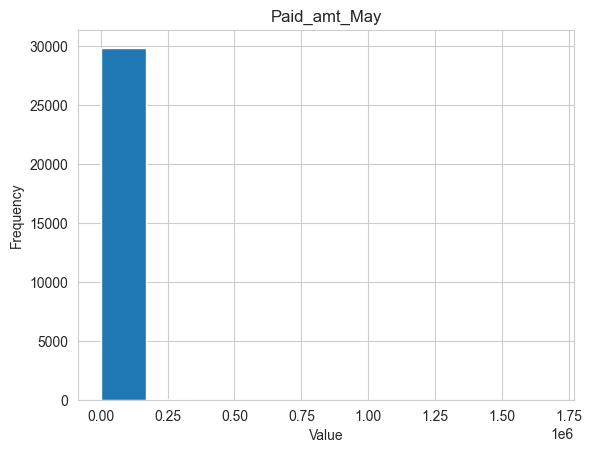

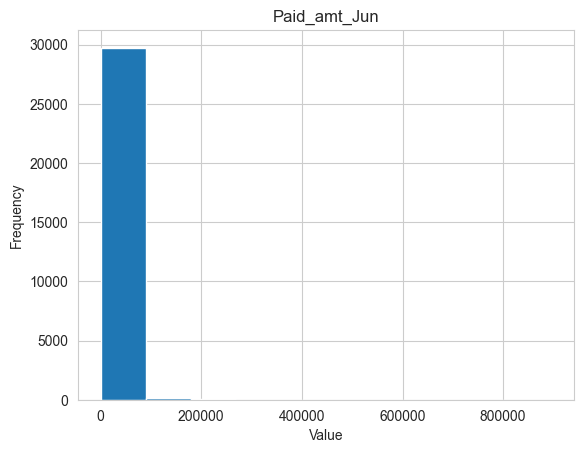

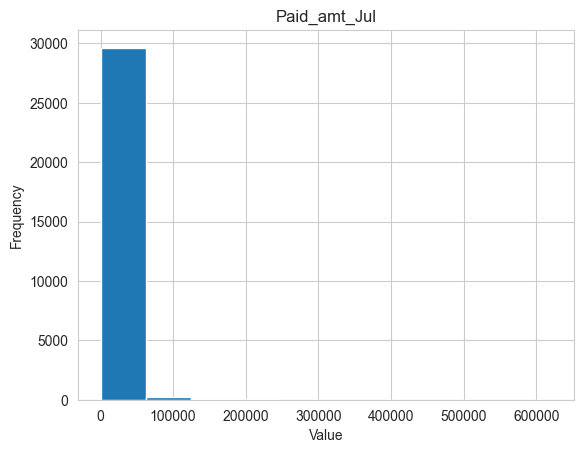

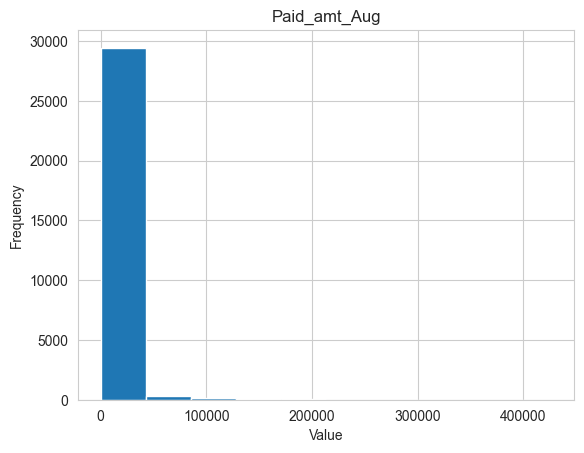

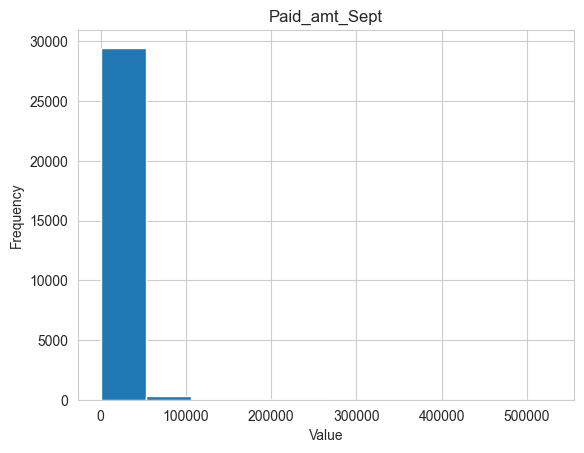

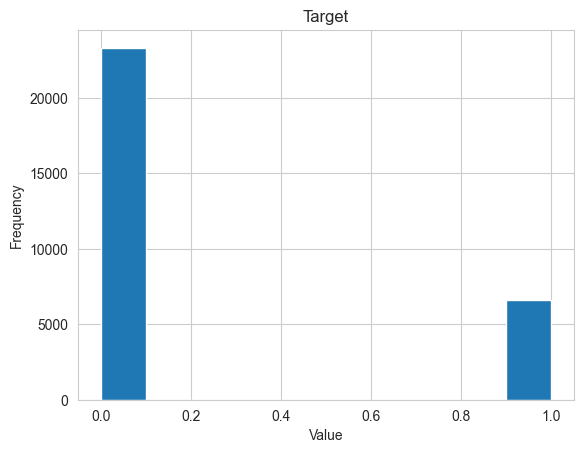

In [241]:
# Histogram plots for each data
# Select the numerical variables you want to plot
num_cols_to_plot = clean_df.select_dtypes(include=['int64']).columns.drop([])

# Create a histogram for each variable
for col in num_cols_to_plot:
    plt.hist(clean_df[col])
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.savefig(f'images/Histogram_{col}.png')
    plt.show()


We observe that majority of the columns have a left skewed distribution. we will consider transforming them during modelling.

In [242]:
# We want to Group price into three categories 
# Define the percentile values for each category
limit = clean_df['Limit_bal']
high_percentile = np.percentile(limit, 75)
low_percentile = np.percentile(limit, 25)

# Group the prices into categories based on the percentiles
high_limit = limit[limit > high_percentile]
medium_limit = limit[(limit >= low_percentile) & (limit <= high_percentile)]
low_limit = limit[limit < low_percentile]

print("Highest credit limit:", high_limit.max())
print("Median credit limit:", medium_limit.median())
print("Lowest credit limit:", low_limit.min())


Highest credit limit: 1000000
Median credit limit: 120000.0
Lowest credit limit: 10000


From the grouping we observe that the highest credit limit is one million while the lowest is ten thousand.

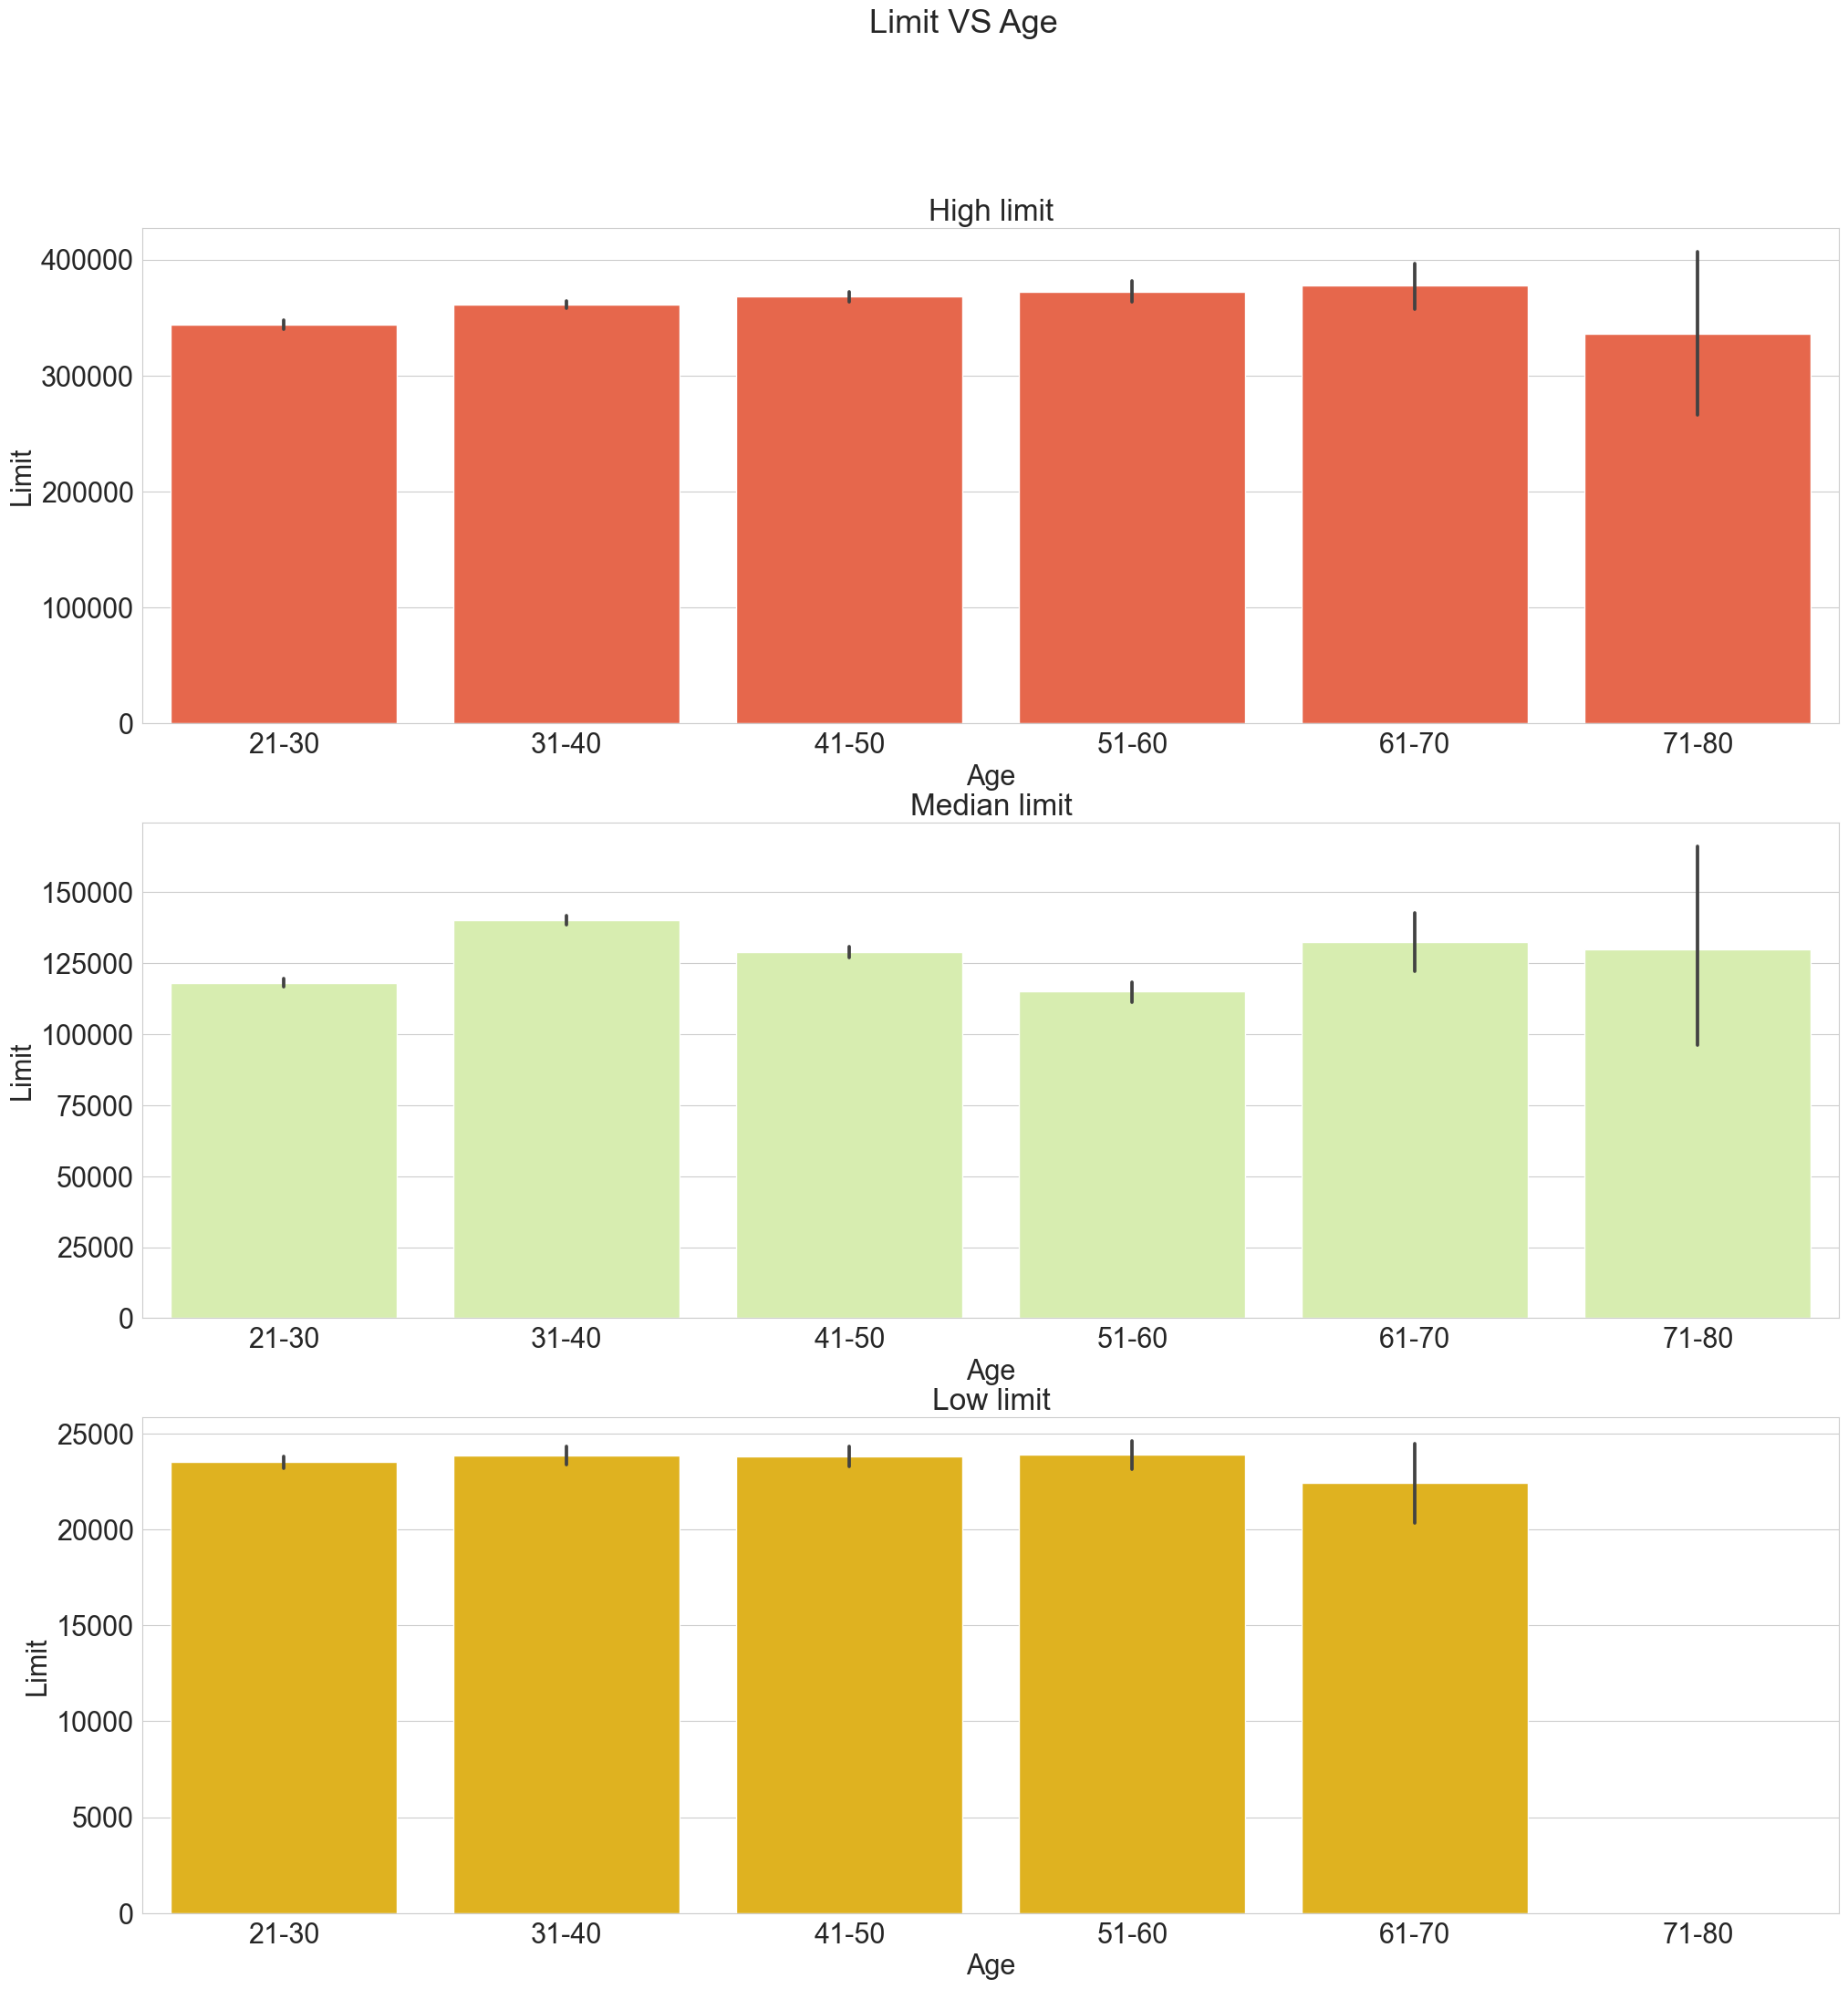

In [243]:

x = clean_df['Age_bin']
y1 = high_limit.sort_values(ascending=False)
y2 = medium_limit.sort_values(ascending=False)
y3 = low_limit.sort_values(ascending=False)

# set plot style
sns.set_style("whitegrid")

# set colors
colors = ["#FFC300", "#DAF7A6", "#FF5733"]

# create figure
fig, ax = plt.subplots(nrows=3, figsize=(24,24), sharex=False, sharey=False)

# bar plot
sns.barplot(x=x, y=y1, color=colors[2], ax=ax[0])
ax[0].set_title("High limit", fontsize=24)
ax[0].set_xlabel("Age", fontsize=22)
ax[0].set_ylabel("Limit", fontsize=22)
ax[0].tick_params(axis='both', which='major',labelsize=22)

# bar plot
sns.barplot(x=x, y=y2, color=colors[1], ax=ax[1])
ax[1].set_title("Median limit", fontsize=24)
ax[1].set_xlabel("Age", fontsize=22)
ax[1].set_ylabel("Limit", fontsize=22)
ax[1].tick_params(axis='both', which='major',labelsize=22)

# bar plot
sns.barplot(x=x, y=y3, color=colors[0], ax=ax[2])
ax[2].set_title("Low limit", fontsize=24)
ax[2].set_xlabel("Age", fontsize=22)
ax[2].set_ylabel("Limit", fontsize=22)
ax[2].tick_params(axis='both', which='major',labelsize=22)

# set title for the whole figure
fig.suptitle("Limit VS Age", fontsize=26)

# adjust spacing
# fig.tight_layout()
# save the plot to file
plt.savefig('Images/Limit Vs Age.png');

# show plot
plt.show()


We observe that for the distribution of age, the limit is almost evenly distributed, although for the bracket 71-80, they all have loan limits above twenty five thousand, with the rest having almost an equal number of limit. 
We can still deduce that the outliers present in the data are in the age group 71 - 80. and it would be appropriate to assume the highest limit is also in this bracket.

Next we will try and plot regression plots to better understand the relationship between the features and the target variabes

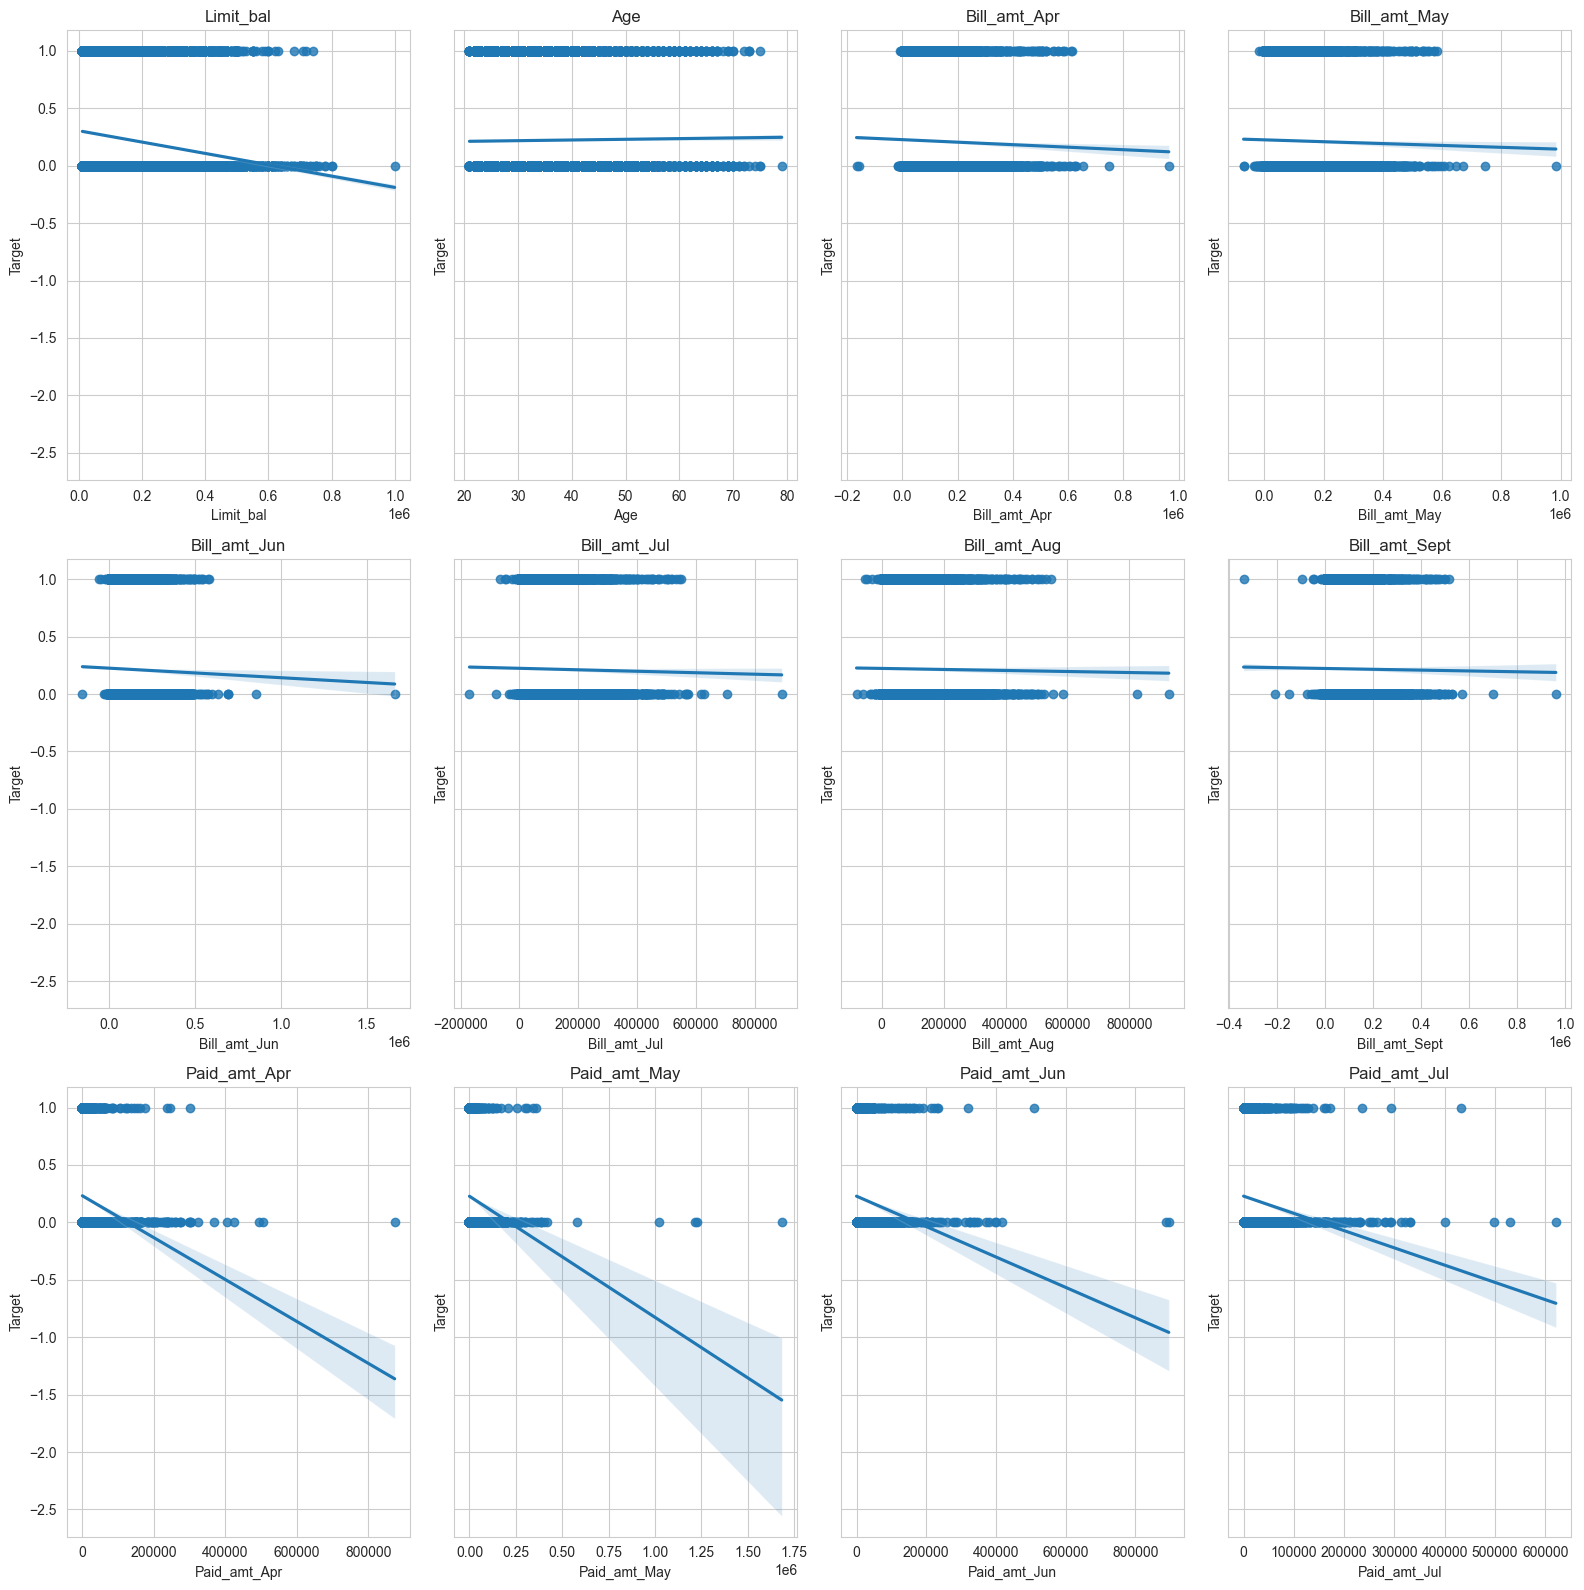

In [244]:
X = clean_df.drop(columns=['Sex', 'Education', 'Marriage', 'Pay_status_Apr',
                            'Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul',
                            'Pay_Status_Aug', 'Pay_Status_Sept'])
fig, axs = plt.subplots(3, 4, figsize=(16, 16), sharey=True)
for i in range(3):
    for j in range(4):
        if i*4 + j < len(X.columns):
            sns.regplot(x=X.iloc[:,i*4+j], y='Target', data=clean_df, ax=axs[i][j])
            axs[i][j].set_title(X.columns[i*4+j])
plt.tight_layout()
plt.savefig("Images/reg plot")
plt.show()

The output above is a grid of regression plots, where each plot shows the relationship between a specific feature and the target variable 'Target'. The plots can help visualize the linear relationship, if any, between the features and the target variable, and provide insights into the potential predictive power of the features.

## Check for correlation

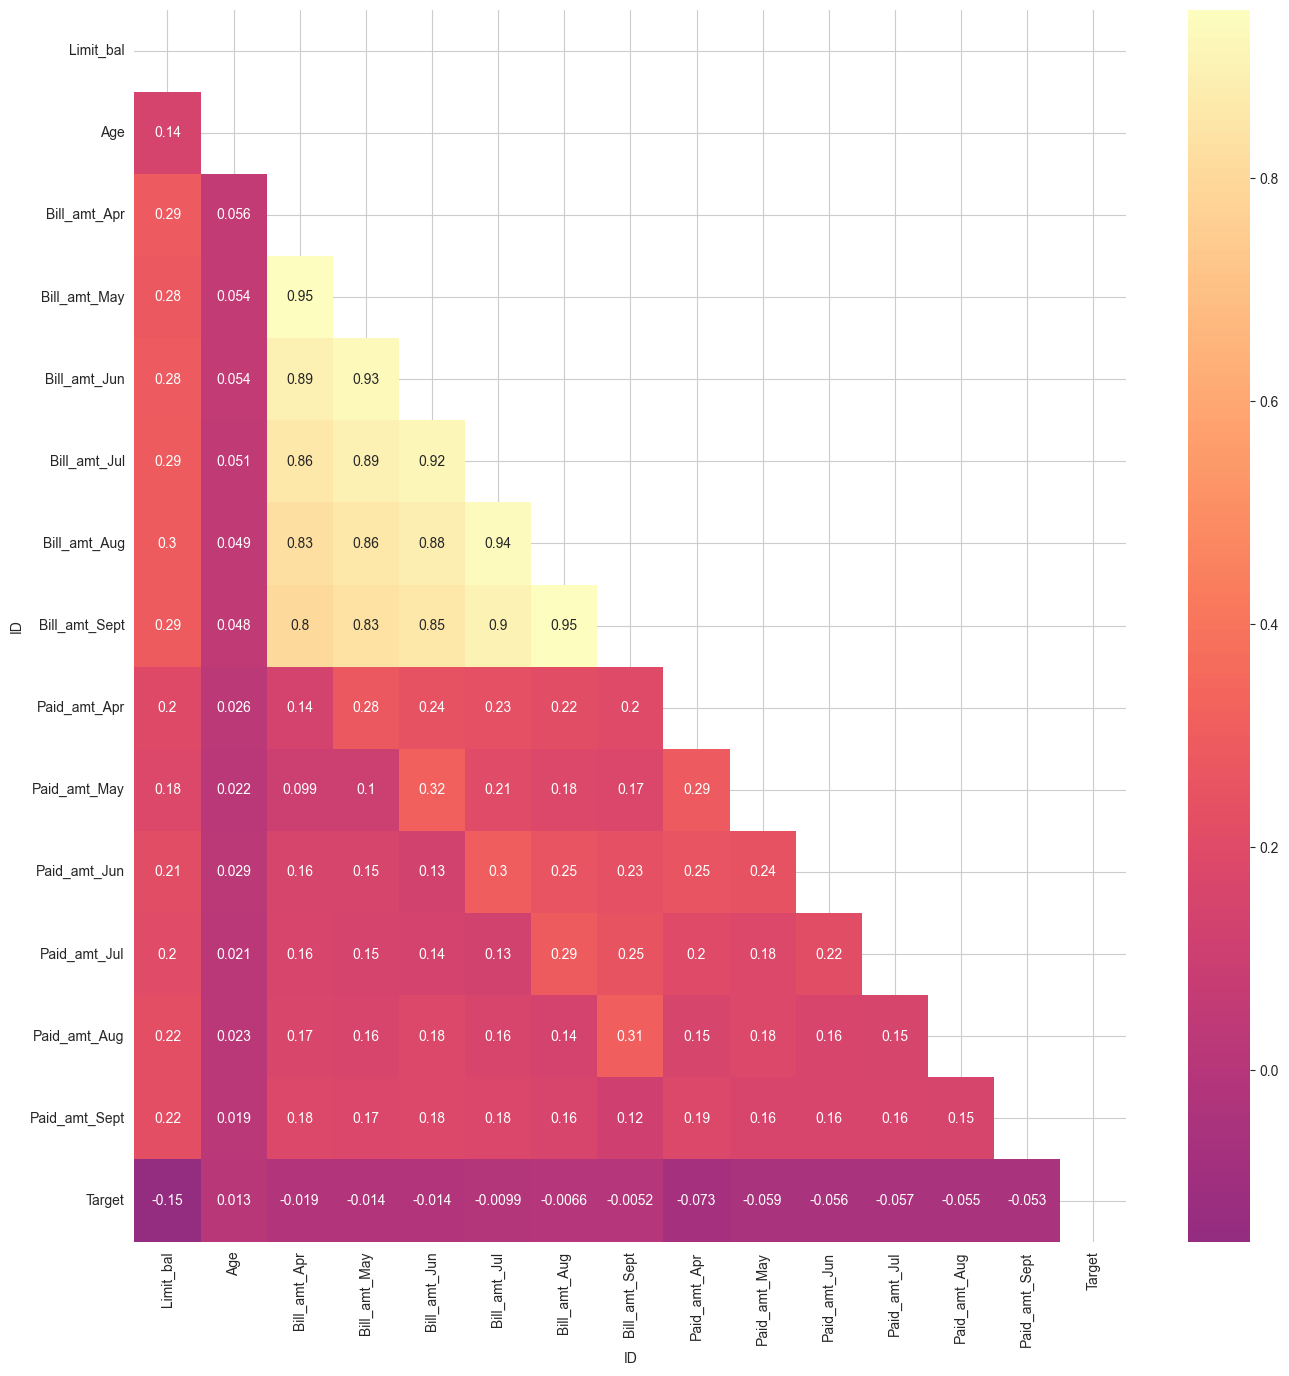

In [245]:
## Multicollinearity
data_corr = clean_df.drop(columns=['Sex', 'Education', 'Marriage', 'Pay_status_Apr',
                            'Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul',
                            'Pay_Status_Aug', 'Pay_Status_Sept', 'Age_bin'])
# Create a correlation matrix
corr_matrix = data_corr.corr()
# Create a fig size
plt.figure(figsize=(16, 16))
# Create a mask to show only the lower triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Plot the heatmap with the lower triangle mask applied
sns.heatmap(corr_matrix, mask=mask, cmap='magma', center=0, annot=True)

# Save figure
plt.savefig('Images/multicollinearity.png');

# Show the plot
plt.show();

## We are drawing only the lower half of the triangle because the matrix is symmetrical, and also to help in reducing redundancy and make it easier to read the matrix. It also saves space, especially when dealing with a large number of variables, and can help to identify patterns or relationships among the variables more quickly



In [246]:
# Looking at correlations between other variables and price
data_corr.corr()["Target"]

ID
Limit_bal       -0.154062
Age              0.013295
Bill_amt_Apr    -0.019437
Bill_amt_May    -0.013981
Bill_amt_Jun    -0.013868
Bill_amt_Jul    -0.009947
Bill_amt_Aug    -0.006551
Bill_amt_Sept   -0.005166
Paid_amt_Apr    -0.072879
Paid_amt_May    -0.058543
Paid_amt_Jun    -0.056198
Paid_amt_Jul    -0.056771
Paid_amt_Aug    -0.055063
Paid_amt_Sept   -0.053129
Target           1.000000
Name: Target, dtype: float64

A correlation matrix is a table that shows the correlation coefficients between different variables. It is a useful tool for understanding the relationships between variables in a dataset. In this case, the correlation matrix includes correlations between various features.we can take a closer look at thes correlation of other features against the  variable 'Target'.

Here's an explanation of the possible correlations provided:

•	Limit_bal: It has a negative correlation of -0.154062 with the target variable 'Target'. This suggests that as the credit limit increases, the likelihood of the target variable being positive (1) decreases, and vice versa.

•	Age: It has a positive correlation of 0.013295 with the target variable 'Target'. This indicates a weak positive relationship between age and the target variable.

•	Bill_amt_Apr, Bill_amt_May, Bill_amt_Jun, Bill_amt_Jul, Bill_amt_Aug, Bill_amt_Sept: These features have negative correlations ranging from -0.019437 to -0.005166 with the target variable 'Target'. The negative correlations suggest that higher bill amounts are associated with a lower likelihood of the target variable being positive.

•	Paid_amt_Apr, Paid_amt_May, Paid_amt_Jun, Paid_amt_Jul, Paid_amt_Aug, Paid_amt_Sept: These features have negative correlations ranging from -0.072879 to -0.053129 with the target variable 'Target'. The negative correlations suggest that higher paid amounts are associated with a lower likelihood of the target variable being positive.

•	Target: It has a correlation coefficient of 1.000000 with itself, which is always 1 as it represents the correlation of a variable with itself.
The correlation coefficients range from -1 to 1, with -1 indicating a strong negative correlation, 0 indicating no correlation, and 1 indicating a strong positive correlation. The provided correlations indicate the strength and direction of the linear relationship between each feature and the target variable. However, it's important to note that correlation does not imply causation, and other factors may influence the relationship between variables.


In [247]:
# We will now take a keen look at the distribution of credit limit
# We observed it as the feature with the highest correlation
plt.figure(figsize=(10, 8))
sns.histplot(data=clean_df, x='Limit_bal', hue=clean_df.Target, kde=True)
plt.title('Distribution of Credit Limit', fontsize=18)
plt.xlabel('Credit Limit', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Save the figure to file
plt.savefig('Images/Credit Limit Vs Default')

# Show the figure
plt.show()

## Modelling

Since our target variable can only have one of two possibilities normal linear regression will not be possible, we will therefore use Logistic regression 
we will begin by separating our data into the target colum and our predictor variables. 
Next we will transform the non-numeric to dummy variables which is the standard way for transforming categorical variables for modelling. 

In [ ]:
# Preview of dataset for reference
clean_df.head(100)

ID,Limit_bal,Sex,Education,Marriage,Age,Pay_status_Apr,Pay_status_May,Pay_Status_Jun,Pay_Status_Jul,Pay_Status_Aug,...,Bill_amt_Aug,Bill_amt_Sept,Paid_amt_Apr,Paid_amt_May,Paid_amt_Jun,Paid_amt_Jul,Paid_amt_Aug,Paid_amt_Sept,Target,Age_bin
1,20000,Female,University,Married,24,Watch,Watch,Performing,Performing,Defaulter,...,0,0,0,689,0,0,0,0,1,21-30
2,120000,Female,University,Single,26,Performing,Watch,Performing,Performing,Performing,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
3,90000,Female,University,Single,34,Performing,Performing,Performing,Performing,Performing,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
4,50000,Female,University,Married,37,Performing,Performing,Performing,Performing,Performing,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
5,50000,Male,University,Married,57,Performing,Performing,Performing,Performing,Performing,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,90000,Male,University,Single,35,Performing,Performing,Performing,Performing,Performing,...,30942,30835,3621,3597,1179,1112,1104,1143,0,31-40
97,360000,Male,Graduate School,Married,43,Performing,Performing,Performing,Performing,Performing,...,26370,9956,8339,3394,12902,27000,0,68978,0,41-50
98,150000,Male,Graduate School,Single,27,Performing,Performing,Performing,Performing,Performing,...,87725,40788,4031,10006,3266,4040,1698,800,0,21-30
99,50000,Female,High School,Married,22,Performing,Performing,Performing,Performing,Performing,...,8866,7899,1411,1194,379,281,321,197,0,21-30


In [ ]:
# Applying Dummy Variables
columns_to_encode = ['Sex', 'Education', 'Marriage', 'Pay_status_Apr',
                        'Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul',
                        'Pay_Status_Aug', 'Pay_Status_Sept']
data_to_encode = clean_df[columns_to_encode]

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(data_to_encode)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

clean_df_encoded = pd.concat([clean_df.drop(columns_to_encode, axis=1), encoded_df], axis=1)
clean_df_encoded


,Limit_bal,Age,Bill_amt_Apr,Bill_amt_May,Bill_amt_Jun,Bill_amt_Jul,Bill_amt_Aug,Bill_amt_Sept,Paid_amt_Apr,Paid_amt_May,...,Pay_Status_Aug_Debt Collection,Pay_Status_Aug_Defaulter,Pay_Status_Aug_Performing,Pay_Status_Aug_Substandard,Pay_Status_Aug_Watch,Pay_Status_Sept_Debt Collection,Pay_Status_Sept_Defaulter,Pay_Status_Sept_Performing,Pay_Status_Sept_Substandard,Pay_Status_Sept_Watch
1,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Defining variables
# we will Drop the Target column from X since it will be our y
# we will also drop the column we created for binned ages since we already have the age column
X = clean_df_encoded.drop(["Target", "Age_bin"], axis=1)
y = clean_df_encoded['Target']
# splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
print("Null value in the y_train split is", y_train.isnull().sum())
print("Null value in the y_test split is", y_test.isnull().sum())
print()
# Removing the null value
y_train.fillna(method='ffill',inplace=True)
y_test.fillna(method='ffill',inplace=True)
print("Null value in the y_train split is removed", y_train.isnull().sum())
print("Null value in the y_test split is removed", y_test.isnull().sum())

Null value in the y_train split is 28
Null value in the y_test split is 16

Null value in the y_train split is removed 0
Null value in the y_test split is removed 0


In [ ]:
# Applying data standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

The process of encoding and scaling often creates ` NaN ` values therefore we will need to fill then to avoid errors in our model.
We will use a method called Simple Imputer provided by the Scikit Learn library 

In [ ]:
# create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on our data
imputer.fit(X_train_scaled)

# transform the data
X_train_imputed = imputer.transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

Now that our data is split and scaled, we will now begin the actual modelling. we will begin by performing a logistic regression and apply a regularization penalty to reduce the effects of multicollinearity that we observed earlier from our feature variables. 

## Baseline with Ridge 

In [ ]:
# Create a Logistic Regression model with Ridge regularization
logreg = LogisticRegression(penalty='l2', solver='liblinear')

# Fit the model to the training data
logreg.fit(X_train_imputed, y_train)


LogisticRegression(solver='liblinear')

In [ ]:
# Checking coefficients
print("coefficients are", logreg.coef_)

coefficients are [[-3.64326197e-01  8.33019507e-02 -6.45555204e-01  3.11968900e-01
   1.70151333e-01  9.56523461e-02  1.85988297e-01  1.32472431e-01
  -4.70728777e-01 -4.48932781e-01 -1.52430690e-01 -1.51454262e-01
  -5.30145577e-02 -2.76691400e-02 -2.52908168e-02  2.52908168e-02
  -6.79469854e-03  7.24075996e-03 -1.03941445e-02  3.69709389e-03
  -2.43604431e-02 -6.00499591e-04  2.44488878e-02 -4.40360861e-03
  -3.00001779e-02  6.11306907e-03  1.76824017e-02  1.19028848e-02
   1.94223221e-02  5.35446190e-02 -1.13074898e-02 -2.79147663e-03
  -3.74197566e-02  8.61141681e-03 -8.85093719e-03  5.19584809e-03
  -7.04363834e-03  2.50124672e-03 -2.23879615e-01  1.65095307e-02
   1.35642363e-02  1.04883908e-02 -7.58867844e-03  1.80466940e-01
  -1.56295543e-02 -1.70859811e-02 -2.47255334e-02  2.24403361e-02
   4.35968733e-02 -2.36148050e-02  8.95599886e-03  1.79093132e-02
   6.93968214e-03]]


In [ ]:
# Create predictions from our model
y_pred1 = logreg.predict(X_test_imputed)
print("Prediction Value Counts")
pred_unique_values, counts1 = np.unique(y_pred1, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values, counts1)]:
    print(f"{value}: {count}")
print("Actual Value Counts")
act_unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in list(zip(act_unique_values, counts)):
    print(f"{value}: {count}")


Prediction Value Counts
0.0: 9000
1.0: 1
Actual Value Counts
0.0: 6963
1.0: 2038


Without much analysis we observe that the model performed very poorly just by the count. Below is a confusion matrix showing the predictions.  We will still perform calculations to determine the accuracy.

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)

print("Confusion Matrix")
print(cm)
print("Matrix intepretation")
print(
"""[[TN  FP]"""
"""[FN  TP]]"""
)

Confusion Matrix
[[6962    1]
 [2038    0]]
Matrix intepretation
[[TN  FP][FN  TP]]


The matrix above can be interpreted as:

>> TN: True Negatives (correctly predicted negatives): 7053 

>> FP: False Positives (incorrectly predicted positives): 1

>> FN: False Negatives (incorrectly predicted negatives): 1946

>> TP: True Positives (correctly predicted positives): 1


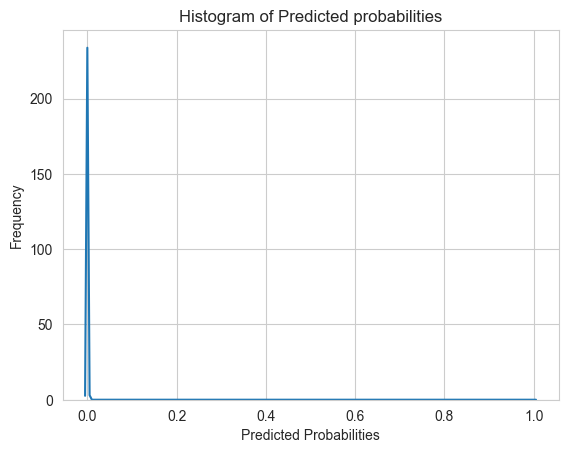

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred1)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/Baseline Predictions")
plt.show()


Below we will create a function (`ClassificationEvaluator`) to evaluate the model that we can re use for future subsequent models.

In [ ]:
# Evaluate All metrics 
evaluator1 = ClassificationEvaluator(y_test, y_pred1)
metrics1 = evaluator1.evaluate()

# print the metrics
for metric, value in metrics1.items():
    print(f"{metric}: {value}")

Accuracy: 0.7734696144872792
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC AUC: 0.4999281918713198


> The Accuracy is the proportion of correctly classified instances of the total number of instances. Our current score show only 77.35% of the instances were classified correctly. 

> Precision shows the proportion of true positive predictions out of the total. 

> We observe a very low Recall score indicating the model only identified a small fraction of actual positive instances. 

> F1-Score shows the overall performance combining both recall and precision. With this score it indicates poor performance as we deduced earlier. 

> The last metric, ROC AUC(Receiver Operating, Characteristic Area Under Curve) measures the models ability to distinguish between positive and negative instances. With a score of close to 0.5, indicates the model has poor discriminatory power.

Overall, the results suggest that the model's performance is subpar. It has low recall, indicating that it fails to identify a significant portion of positive instances. The precision is also low, suggesting a high rate of false positives. The F1-score and ROC AUC further confirm the poor performance of the model. Further analysis and improvement of the model may be necessary to achieve better results.

We will investigate the impact of class imbalance in our target variable, and based on the findings we will perform Oversampling of the minority class or undersampling of the majority class. 
We will also employ cross validation to obtain more reliable estimates of the models performance to reduce overfitting.
We should also do a log transformation of the data to ensure the data is normally distributed.

### Class Imbalance Investigation
We will create a pie chart of the values in the `Target` column below. 

Class distribution is Target
0    23335
1     6622
Name: count, dtype: int64


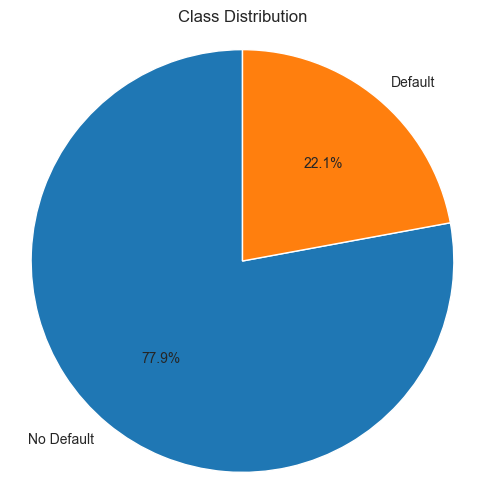

In [ ]:
# Calculate the count of each class in the target column
class_count = clean_df['Target'].value_counts()
print("Class distribution is", class_count)
class_labels = ['No Default', 'Default']
# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(class_count, labels=class_labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Class Distribution')
plt.savefig("Images/Class distribution")
plt.show()

Assessing the severity of class imbalance to determine if it requires addressing. 

In [ ]:
# calculate imbalance ratio
imbalance_ratio = class_count[0] / class_count[1]


# Asses the severity
if imbalance_ratio > 5:
    severity = "severe and requires addressing"
elif imbalance_ratio > 1:
    severity = "moderate and may require addressing"
else:
    severity = "not significant"


# Print the ratio
print(f"The class imbalance is {severity}.  \
        Class Imbalance Ratio: {imbalance_ratio: .2f}")


The class imbalance is moderate and may require addressing.          Class Imbalance Ratio:  3.52


In [ ]:
# Create the combined sampling pipeline
sampling_pipeline = make_pipeline(
    RandomUnderSampler(random_state=42),
    SMOTE(random_state=42)
)

# Apply the combined sampling pipeline
X_resampled, y_resampled = sampling_pipeline.fit_resample(X_train_imputed,y_train)

In [ ]:
# calculate imbalance ratio
class_count1 = y_resampled.value_counts()
print("Class distribution is", class_count1)

imbalance_ratio2 = class_count1[0] / class_count1[1]

print()
# Asses the severity
if imbalance_ratio2 > 5:
    severity = "severe and requires addressing"
elif imbalance_ratio2 > 1:
    severity = "moderate and may require addressing"
else:
    severity = "not significant"


# Print the ratio
print(f"The class imbalance is {severity}. \
        Class Imbalance Ratio: {imbalance_ratio2: .2f}")

Class distribution is Target
0.0    4589
1.0    4589
Name: count, dtype: int64

The class imbalance is not significant.         Class Imbalance Ratio:  1.00


We now observe that our y_train is no longer imbalanced, although this does not necessarily mean the model will perform better.
Below we will attempt to build our second model that will use the newly transformed data, and we will also employ cross validation measures. Specifically, K-fold cross validation with 5 folds. We will also use the same parameters we used before.

In [ ]:
# Define classifier model
classifier = LogisticRegression(penalty='l2', solver='liblinear')

# Perform K-fold validation with 5 folds
k=5
cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=k, scoring='accuracy')

# print the performance metrics for each fold
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1} accuracy: {score}")
    
# calculate and print the average performance across all folds
avg_score = np.mean(cv_scores)
print(f"Average accuracy: {avg_score}")

Fold 1 accuracy: 0.6149237472766884
Fold 2 accuracy: 0.6040305010893247
Fold 3 accuracy: 0.6143790849673203
Fold 4 accuracy: 0.6038147138964578
Fold 5 accuracy: 0.6065395095367847
Average accuracy: 0.6087375113533152


We observe the best performing model had an accuracy of 61.49%, while the average was 60.87%.
Lets now make out predictions below and assign them to y_pred2

In [ ]:
# Fit the logistic regression model with training data
classifier.fit(X_resampled, y_resampled)

# Make predictions
y_pred2 = classifier.predict(X_test_imputed)

# Checking values
print("Prediction Value Counts")
pred_unique_values2, counts2 = np.unique(y_pred2, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values2, counts2)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in list(zip(act_unique_values, counts)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred2)

print("Confusion Matrix")
print(cm1)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0.0: 4019
1.0: 4982

Actual Value Counts
0.0: 6963
1.0: 2038

Confusion Matrix
[[3460 3503]
 [ 559 1479]]

[[TN  FP]
[FN  TP]]


We wil now get performance metrics for our new model

In [ ]:
F1_Score1 = f1_score(y_test, y_pred1)
F1_Score2 = f1_score(y_test, y_pred2)

print("The baseline model F1-Score is:", F1_Score1)
print("The classifier model F1-Score is:", F1_Score2)
print()
print("The classifier model has shown substantial improvement in predicting the positive class compared to the baseline model. ")

The baseline model F1-Score is: 0.0
The classifier model F1-Score is: 0.42136752136752137

The classifier model has shown substantial improvement in predicting the positive class compared to the baseline model. 


In [ ]:
evaluator1 = ClassificationEvaluator(y_test, y_pred1)
ROC_AUC1 = evaluator1.roc_auc()

evaluator2 = ClassificationEvaluator(y_test, y_pred2)
ROC_AUC2 = evaluator2.roc_auc()

print("The baseline model roc_auc is:", ROC_AUC1)
print("The classifier model roc_auc is:", ROC_AUC2)
print()
print(
    "The classifier model has a higher ROC AUC score compared to the baseline model, It suggests that the model can rank positive instances higher than negative instances more consistently than the baseline model."
)

The baseline model roc_auc is: 0.4999281918713198
The classifier model roc_auc is: 0.6113118661558494

The classifier model has a higher ROC AUC score compared to the baseline model, It suggests that the model can rank positive instances higher than negative instances more consistently than the baseline model.


The Model does improve in performance, but it is not near the score we would want to use as a determiner for policy changes. 
We will now try and log transform our data to see if it would have an improvement. 
We will do the transformations to the columns

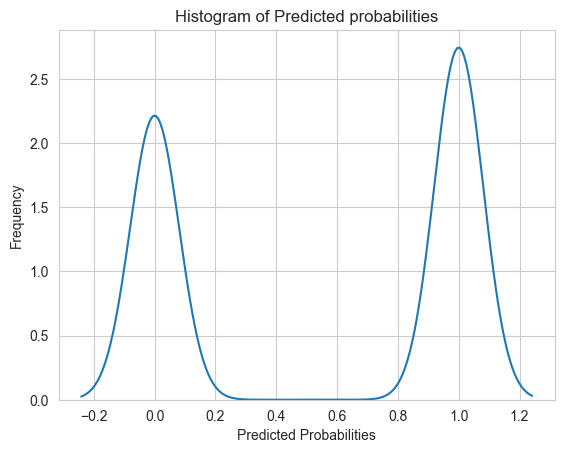

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred2)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/Classifier predictions")
plt.show()

We observe that the predictions moved from a left skewed shape to a bimodal shape. we can attempt to repeat the above models but instead of applying ridge regression, we use lasso regression and observe how it will perform.

## Lasso Model

In [ ]:
# Create a Logistic Regression model with Lasso regularization
logregLasso = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model to the training data
logregLasso.fit(X_resampled, y_resampled)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
# Fit the logistic regression model with training data
logregLasso.fit(X_resampled, y_resampled)

# Make predictions
y_pred3 = logregLasso.predict(X_test_imputed)

# Checking values
print("Prediction Value Counts")
pred_unique_values3, counts3 = np.unique(y_pred3, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values3, counts3)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in list(zip(act_unique_values, counts)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred3)

print("Confusion Matrix")
print(cm2)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0.0: 4010
1.0: 4991

Actual Value Counts
0.0: 6963
1.0: 2038

Confusion Matrix
[[3453 3510]
 [ 557 1481]]

[[TN  FP]
[FN  TP]]


In [ ]:
# Evaluate All metrics 
evaluator3 = ClassificationEvaluator(y_test, y_pred3)
metrics3 = evaluator3.evaluate()

# print the metrics
for metric, value in metrics3.items():
    print(f"{metric}: {value}")

Accuracy: 0.5481613154093989
Precision: 0.2967341214185534
Recall: 0.7266928361138371
F1-Score: 0.4213970692843932
ROC AUC: 0.6112998863895338


The accuracy score of 0.548 means the model correctly predicts  approximately 54.8% of the default cases. Although with the low precision score of 0.297 indicates that the model is correct only about 29.7% of the time, this translates to a high number of false positives. 
Looking at the recall which is the sensitivity aka true positive rate of 0.727, means that the model correctly identifies 72.7% of the actual defaults, although with a relatively high rate of false negatives as well.
the F1-score combines both precision and recall to a single metric. having a score of 0.421 indicates a moderate balance between recall and precision.
The ROC AUC scored 0.611, with is a significant improvement from the baseline model. this means that the model's ability to discriminate between default and non default is modest.

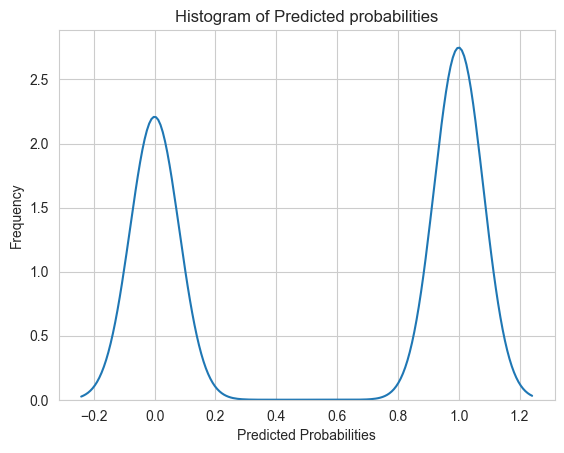

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred3)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/logreglasso predictions")
plt.show()

## Classifier with Lasso


In [ ]:
# Define classifier model
classifierLasso = LogisticRegression(penalty='l1', solver='liblinear')

# Perform K-fold validation with 5 folds
k=5
cv_scores1 = cross_val_score(classifierLasso, X_resampled, y_resampled, cv=k, scoring='accuracy')

# print the performance metrics for each fold
for i, score in enumerate(cv_scores1):
    print(f"Fold {i+1} accuracy: {score}")
    
# calculate and print the average performance across all folds
avg_score1 = np.mean(cv_scores1)
print(f"Average accuracy: {avg_score1}")

Fold 1 accuracy: 0.616557734204793
Fold 2 accuracy: 0.6045751633986928
Fold 3 accuracy: 0.6127450980392157
Fold 4 accuracy: 0.6059945504087193
Fold 5 accuracy: 0.6054495912806539
Average accuracy: 0.609064427466415


The average accuracy across all folds is 0.6091. This suggests that the classifier model performs moderately well in predicting credit card defaults, with an overall accuracy of around 60.9%.

In [ ]:
# Fit the logistic regression model with training data
classifierLasso.fit(X_resampled, y_resampled)

# Make predictions
y_pred4 = classifierLasso.predict(X_test_imputed)

# Checking values
print("Prediction Value Counts")
pred_unique_values4, counts4 = np.unique(y_pred4, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values4, counts4)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in list(zip(act_unique_values, counts)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred4)

print("Confusion Matrix")
print(cm3)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0.0: 4010
1.0: 4991

Actual Value Counts
0.0: 6963
1.0: 2038

Confusion Matrix
[[3453 3510]
 [ 557 1481]]

[[TN  FP]
[FN  TP]]


In [ ]:
# Evaluate All metrics 
evaluator4 = ClassificationEvaluator(y_test, y_pred4)
metrics4 = evaluator4.evaluate()

# print the metrics
for metric, value in metrics4.items():
    print(f"{metric}: {value}")

Accuracy: 0.5481613154093989
Precision: 0.2967341214185534
Recall: 0.7266928361138371
F1-Score: 0.4213970692843932
ROC AUC: 0.6112998863895338


Accuracy represents the overall correctness of the predictions, indicating that the model is accurate in approximately 54.8% of cases.
A precision score of 0.2967 suggests that the model has a relatively low precision, meaning that there are a significant number of false positive predictions.
The recall score of 0.7267 indicates that the model is able to capture a relatively high percentage of the true positive cases.
A higher F1-Score (0.4214) indicates a better balance between precision and recall.
The ROC AUC score of 0.6113 suggests that the model has some discriminative power, but it is not highly accurate in distinguishing between the two classes.

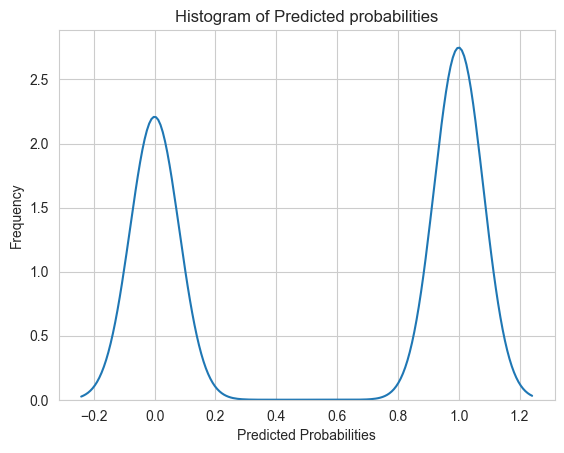

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred4)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/classifierlasso predictions")
plt.show()

The prediction is way below desired metrics, we will try and adopt decision trees to see if they will have a better prediction metrics. 
to improve the features we will also apply PCA(Principal Component Analysis) which is a statistical technique for dimensionality reduction of high-dimensional data, whereby it transforms the original data into a new, lower-dimensional feature space while preserving as much of the original variation or structure in the data as possible.

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_resampled)
X_test_pca = pca.fit_transform(X_test_imputed)


Let's see if the classifier model will have an improved score after PCA


In [ ]:
# Define classifier model
classifier2 = LogisticRegression(penalty='l2', solver='liblinear')

# Perform K-fold validation with 5 folds
k=5
cv_scores_pca = cross_val_score(classifier2, X_train_pca, y_resampled, cv=k, scoring='accuracy')

# print the performance metrics for each fold
for i, score in enumerate(cv_scores_pca):
    print(f"Fold {i+1} accuracy: {score}")
    
# calculate and print the average performance across all folds
avg_score_pca = np.mean(cv_scores_pca)
print(f"Average accuracy: {avg_score_pca}")
print()
# Fit the logistic regression model with training data
classifier2.fit(X_train_pca, y_resampled)

# Make predictions
y_pred_pca = classifierLasso.predict(X_test_pca)

# Checking values
print("Prediction Value Counts")
pred_unique_values_pca, counts_pca = np.unique(y_pred_pca, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values_pca, counts_pca)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in list(zip(act_unique_values, counts)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)

print("Confusion Matrix")
print(cm_pca)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Fold 1 accuracy: 0.6149237472766884
Fold 2 accuracy: 0.6040305010893247
Fold 3 accuracy: 0.6143790849673203
Fold 4 accuracy: 0.6038147138964578
Fold 5 accuracy: 0.6065395095367847
Average accuracy: 0.6087375113533152

Prediction Value Counts
0.0: 3586
1.0: 5415

Actual Value Counts
0.0: 6963
1.0: 2038

Confusion Matrix
[[2806 4157]
 [ 780 1258]]

[[TN  FP]
[FN  TP]]


The average accuracy provides an estimate of how well the classifier model performs on unseen data. In this case, the average accuracy suggests that the model is correct in approximately 60.9% of cases.

In [ ]:
# Evaluate All metrics 
evaluator5 = ClassificationEvaluator(y_test, y_pred_pca)
metrics5 = evaluator5.evaluate()

# print the metrics
for metric, value in metrics5.items():
    print(f"{metric}: {value}")

Accuracy: 0.45150538829019
Precision: 0.23231763619575255
Recall: 0.6172718351324828
F1-Score: 0.33758218167181003
ROC AUC: 0.5101295266427889



The accuracy of the classifier model is approximately 0.4537, indicating that the model correctly predicts the class of the target variable in around 45.4% of cases.

The precision score is approximately 0.2208, which suggests that out of all the instances predicted as positive, only 22.1% are actually true positives.

The recall score is approximately 0.6030, indicating that the model identifies around 60.3% of the actual positive instances.

The F1-Score, which combines precision and recall, is approximately 0.3232. This score provides a balanced measure of the model's performance in terms of both positive and negative predictions.

The ROC AUC score is approximately 0.5078, which suggests that the model's ability to distinguish between positive and negative instances is only slightly better than random chance.

These evaluation metrics indicate that the classifier model has relatively low performance in terms of accuracy, precision, recall, F1-Score, and ROC AUC. It may require further improvement or exploration of other models or techniques to enhance its predictive capabilities.

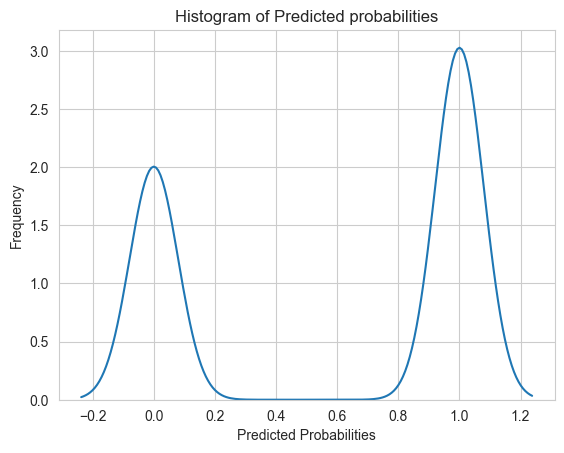

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred_pca)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/pca predictions")
plt.show()

This model still performed worse than all the other models. now we will focus on the decision trees. 

In [ ]:
# Create a Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train_pca, y_resampled)

# Make predictions on the testing data
y_pred_clf = clf.predict(X_test_pca)

# Checking values
print("Prediction Value Counts")
pred_unique_values_clf, counts_clf = np.unique(y_pred_clf, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values_clf, counts_clf)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in list(zip(act_unique_values, counts)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm_clf = confusion_matrix(y_test, y_pred_clf)

print("Confusion Matrix")
print(cm_clf)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0.0: 4765
1.0: 4236

Actual Value Counts
0.0: 6963
1.0: 2038

Confusion Matrix
[[3690 3273]
 [1075  963]]

[[TN  FP]
[FN  TP]]


In [ ]:
# Evaluate All metrics 
evaluator6 = ClassificationEvaluator(y_test, y_pred_clf)
metrics6 = evaluator6.evaluate()

# print the metrics
for metric, value in metrics6.items():
    print(f"{metric}: {value}")

Accuracy: 0.5169425619375625
Precision: 0.2273371104815864
Recall: 0.47252208047105004
F1-Score: 0.30698119222186804
ROC AUC: 0.5012330350653397


The accuracy of the classifier model is approximately 0.5156, indicating that the model correctly predicts the class of the target variable in around 51.6% of cases.

The precision score is approximately 0.2277, which suggests that out of all the instances predicted as positive, only 22.8% are actually true positives.

The recall score is approximately 0.4764, indicating that the model identifies around 47.6% of the actual positive instances.

The F1-Score, which combines precision and recall, is approximately 0.3082. This score provides a balanced measure of the model's performance in terms of both positive and negative predictions.

The ROC AUC score is approximately 0.5018, which suggests that the model's ability to distinguish between positive and negative instances is close to random chance.

These evaluation metrics indicate that the classifier model has relatively low performance in terms of accuracy, precision, recall, F1-Score, and ROC AUC. It may require further improvement or exploration of other models or techniques to enhance its predictive capabilities.

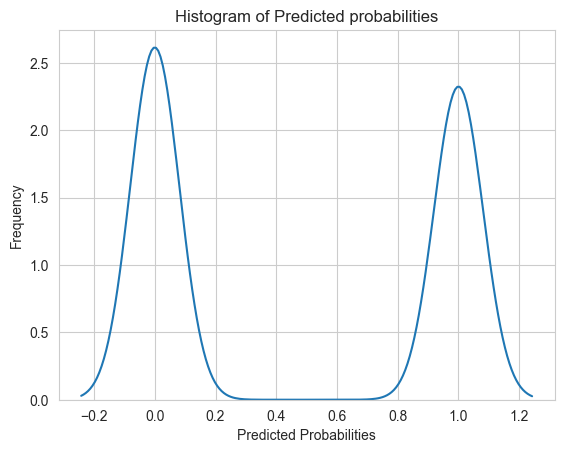

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred_clf)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/Decision tree predictions")
plt.show()

The model does improve, but the baseline model still has a higher accuracy score than all others. we will need to improve out model to see if it will have a better performance. 

In [ ]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

pipe = Pipeline([
    ('hyperparameter_tuning', GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5))
])

In [ ]:
# Fit the pipeline to the training data
pipe.fit(X_train_pca, y_resampled)

Pipeline(steps=[('hyperparameter_tuning',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid={'max_depth': [None, 10, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10]}))])

In [ ]:
# Predict the target variable for the test data
y_pred_pipe = pipe.predict(X_test_pca)

In [ ]:
# Checking values
print("Prediction Value Counts")
pred_unique_values_pipe, counts_pipe = np.unique(y_pred_pipe, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values_pipe, counts_pipe)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in list(zip(act_unique_values, counts)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm_pipe = confusion_matrix(y_test, y_pred_pipe)

print("Confusion Matrix")
print(cm_pipe)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0.0: 4674
1.0: 4327

Actual Value Counts
0.0: 6963
1.0: 2038

Confusion Matrix
[[3688 3275]
 [ 986 1052]]

[[TN  FP]
[FN  TP]]


In [ ]:
# Evaluate All metrics 
evaluator7 = ClassificationEvaluator(y_test, y_pred_pipe)
metrics7 = evaluator7.evaluate()

# print the metrics
for metric, value in metrics7.items():
    print(f"{metric}: {value}")

Accuracy: 0.5266081546494834
Precision: 0.24312456667437024
Recall: 0.5161923454367027
F1-Score: 0.3305577376276512
ROC AUC: 0.5229245512908056


The accuracy of the classifier model is approximately 0.5295, indicating that the model correctly predicts the class of the target variable in around 52.9% of cases.

The precision score is approximately 0.2433, which suggests that out of all the instances predicted as positive, only 24.3% are actually true positives.

The recall score is approximately 0.5108, indicating that the model identifies around 51.1% of the actual positive instances.

The F1-Score, which combines precision and recall, is approximately 0.3296. This score provides a balanced measure of the model's performance in terms of both positive and negative predictions.

The ROC AUC score is approximately 0.5229, which suggests that the model's ability to distinguish between positive and negative instances is slightly better than random chance.

These evaluation metrics indicate that the classifier model has moderate performance in terms of accuracy, precision, recall, F1-Score, and ROC AUC. Further improvements could be explored to enhance its predictive capabilities.

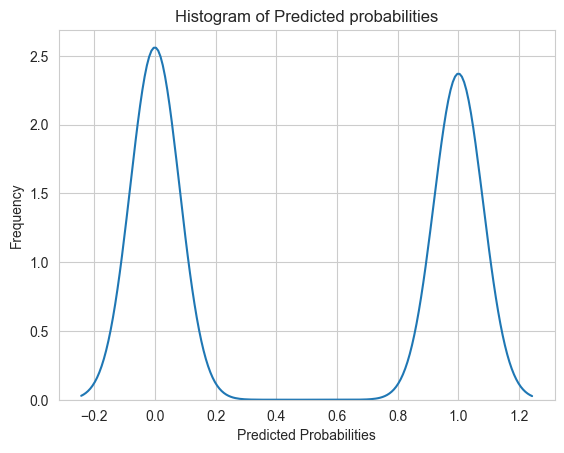

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred_pipe)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/pipe predictions")
plt.show()

## Random Forest Classifier

In [ ]:
# Create an instance of Random Forest Classifier
rf_classifier = RandomForestClassifier()
# Train the model 
rf_classifier.fit(X_train_pca, y_resampled)

# Make Predictions
y_pred_rf = rf_classifier.predict(X_test_pca)


In [ ]:
# Checking values
print("Prediction Value Counts")
pred_unique_values_rf, counts_rf = np.unique(y_pred_rf, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values_rf, counts_rf)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in list(zip(act_unique_values, counts)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix")
print(cm_rf)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0.0: 6042
1.0: 2959

Actual Value Counts
0.0: 6963
1.0: 2038

Confusion Matrix
[[4790 2173]
 [1252  786]]

[[TN  FP]
[FN  TP]]


In [ ]:
# Evaluate All metrics 
evaluator8 = ClassificationEvaluator(y_test, y_pred_rf)
metrics8 = evaluator8.evaluate()

# print the metrics
for metric, value in metrics8.items():
    print(f"{metric}: {value}")

Accuracy: 0.619486723697367
Precision: 0.26563028050016896
Recall: 0.3856722276741904
F1-Score: 0.3145887532519512
ROC AUC: 0.5367970502150932


The accuracy of the classifier model is approximately 0.6190, indicating that the model correctly predicts the class of the target variable in around 61.9% of cases.

The precision score is approximately 0.2545, which suggests that out of all the instances predicted as positive, only 25.5% are actually true positives.

The recall score is approximately 0.3538, indicating that the model identifies around 35.4% of the actual positive instances.

The F1-Score, which combines precision and recall, is approximately 0.2960. This score provides a balanced measure of the model's performance in terms of both positive and negative predictions.

The ROC AUC score is approximately 0.5252, which suggests that the model's ability to distinguish between positive and negative instances is slightly better than random chance.

These evaluation metrics indicate that the classifier model has moderate performance in terms of accuracy, precision, recall, F1-Score, and ROC AUC. Further improvements could be explored to enhance its predictive capabilities.

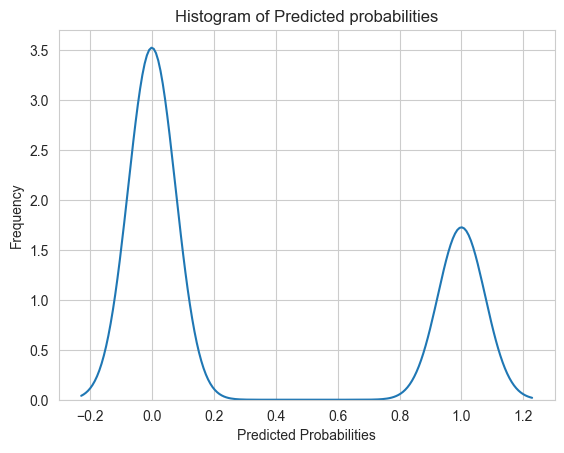

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred_rf)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/Random Forest predictions")
plt.show()

These metrics provide an evaluation of the classifier's performance. It's important to note that while the accuracy is improved compared to the previous decision tree classifier, the precision, recall, and F1-score are relatively low. This suggests that the model may have difficulty correctly identifying positive cases of credit card default. Further improvements may be needed, such as exploring different algorithms or feature engineering techniques.

Based on the predicted value counts observed earlier, we can deduce that this is our best model so far.
To get better results we will conduct feature selection to identify the most important feature to use in our model to ensure optimum results. 
this means that we will have to go back to our initial dataset and perform best feature tests.
 

But before that we can try and see how a bayes classification model can perform on our dataset. 

## Naive Bayes 

In [ ]:
# create an Gaussian Naive Bayes Classifier
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train_pca, y_resampled)

# Make predictions on test data
y_pred_GNB = naive_bayes.predict(X_test_pca)

In [ ]:
# Checking values
print("Prediction Value Counts")
pred_unique_values_GNB, counts_GNB = np.unique(y_pred_GNB, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values_GNB, counts_GNB)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values, counts = np.unique(y_test, return_counts=True)
for value, count in list(zip(act_unique_values, counts)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm_GNB = confusion_matrix(y_test, y_pred_GNB)

print("Confusion Matrix")
print(cm_GNB)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0.0: 1652
1.0: 7349

Actual Value Counts
0.0: 6963
1.0: 2038

Confusion Matrix
[[1393 5570]
 [ 259 1779]]

[[TN  FP]
[FN  TP]]


In [ ]:
# Evaluate All metrics 
evaluator9 = ClassificationEvaluator(y_test, y_pred_rf)
metrics9 = evaluator9.evaluate()

# print the metrics
for metric, value in metrics9.items():
    print(f"{metric}: {value}")

Accuracy: 0.619486723697367
Precision: 0.26563028050016896
Recall: 0.3856722276741904
F1-Score: 0.3145887532519512
ROC AUC: 0.5367970502150932


We observe that this model performed the exact same way as the Random forest model.

In [ ]:
clean_df.columns

Index(['Limit_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_status_Apr',
       'Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul', 'Pay_Status_Aug',
       'Pay_Status_Sept', 'Bill_amt_Apr', 'Bill_amt_May', 'Bill_amt_Jun',
       'Bill_amt_Jul', 'Bill_amt_Aug', 'Bill_amt_Sept', 'Paid_amt_Apr',
       'Paid_amt_May', 'Paid_amt_Jun', 'Paid_amt_Jul', 'Paid_amt_Aug',
       'Paid_amt_Sept', 'Target', 'Age_bin'],
      dtype='object', name='ID')

In [ ]:
# Subsetting the dataset again considering the above columns only
X_featured = clean_df[['Bill_amt_Apr', 'Bill_amt_May', 'Bill_amt_Jun',
        'Bill_amt_Jul', 'Bill_amt_Aug', 'Bill_amt_Sept', 'Paid_amt_Apr',
        'Paid_amt_May', 'Paid_amt_Jun', 'Paid_amt_Jul', 'Paid_amt_Aug',
        'Paid_amt_Sept']]
y2 = clean_df['Target']

We will try and redo the initial models , but we will also apply the preprocessing steps we did before to ensure we have optimal models.

In [ ]:
# Performing split
X_featured_train, X_featured_test, y_train2, y_test2 = train_test_split(X_featured, y2, test_size=0.3, random_state=42)


In [ ]:
# Applying data standardization
scaler = StandardScaler()
scaler.fit(X_featured_train)
X_featured_train_scaled = scaler.transform(X_featured_train)
X_featured_test_scaled = scaler.transform(X_featured_test)

In [ ]:
# create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on our data
imputer.fit(X_featured_train_scaled)

# transform the data
X_featured_train_imputed = imputer.transform(X_featured_train_scaled)
X_featured_test_imputed = imputer.transform(X_featured_test_scaled)

In [ ]:
# Create the combined sampling pipeline
sampling_pipeline = make_pipeline(
    RandomUnderSampler(random_state=42),
    SMOTE(random_state=42)
)

# Apply the combined sampling pipeline
X_featured_resampled, y_resampled2 = sampling_pipeline.fit_resample(X_featured_train_imputed,y_train2)

In [ ]:
X_featured_train_pca = pca.fit_transform(X_featured_resampled)
X_featured_test_pca = pca.fit_transform(X_featured_test_imputed)

## Baseline with X_Featured columns


In [ ]:
# fitting logreg to X_featured_train and Y_train
logreg.fit(X_featured_train_pca, y_resampled2)

# make predictions
y_pred_featured = logreg.predict(X_featured_test_pca)

In [ ]:
# Checking values
print("Prediction Value Counts")
pred_unique_values_featured, counts_featured = np.unique(y_pred_featured, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values_featured, counts_featured)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values2, counts2 = np.unique(y_test2, return_counts=True)
for value, count in list(zip(act_unique_values2, counts2)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm_featured = confusion_matrix(y_test2, y_pred_featured)

print("Confusion Matrix")
print(cm_featured)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0: 2504
1: 6484

Actual Value Counts
0: 6956
1: 2032

Confusion Matrix
[[2174 4782]
 [ 330 1702]]

[[TN  FP]
[FN  TP]]


In [ ]:
# Evaluate All metrics 
evaluator_featured = ClassificationEvaluator(y_test2, y_pred_featured)
metrics_featured = evaluator_featured.evaluate()

# print the metrics
for metric, value in metrics_featured.items():
    print(f"{metric}: {value}")

Accuracy: 0.43124165554072097
Precision: 0.26249228871067243
Recall: 0.8375984251968503
F1-Score: 0.3997181775481447
ROC AUC: 0.5750671826961825


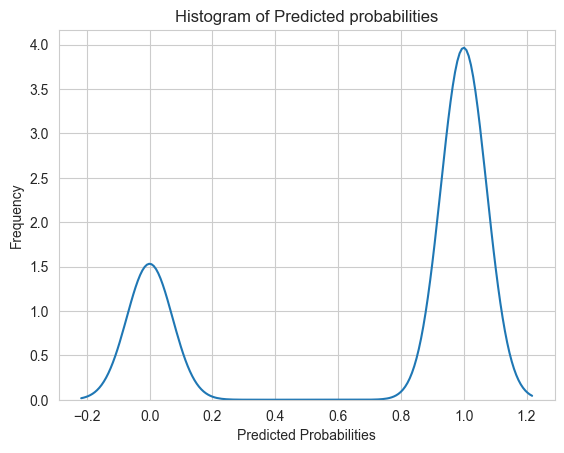

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred_featured)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/classification featured predictions")
plt.show()

These performance metrics indicate that the model is struggling to accurately predict the positive class. The low precision suggests a high rate of false positives, while the low F1-score suggests a lack of balance between precision and recall. It is important to further investigate the model and data. The Area Under the ROC Curve (ROC AUC) provides a measure of the model's ability to distinguish between positive and negative samples. The ROC AUC value you provided is moderate, suggesting that the model performs better than random guessing but has room for improvement.

## Pipeline with X_featured


In [ ]:
# Fit the classifier
pipe_featured = pipe.fit(X_featured_train_pca, y_resampled2)

# Make predicitions
y_pred_pipe_feat = pipe.predict(X_featured_test_pca)

In [ ]:
# Checking values
print("Prediction Value Counts")
pred_unique_values_pipe_feat, counts_pipe_feat = np.unique(y_pred_pipe_feat, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values_pipe_feat, counts_pipe_feat)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values2, counts2 = np.unique(y_test2, return_counts=True)
for value, count in list(zip(act_unique_values2, counts2)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm_pipe_feat = confusion_matrix(y_test2, y_pred_pipe_feat)

print("Confusion Matrix")
print(cm_pipe_feat)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0: 4876
1: 4112

Actual Value Counts
0: 6956
1: 2032

Confusion Matrix
[[3997 2959]
 [ 879 1153]]

[[TN  FP]
[FN  TP]]


In [ ]:
# Evaluate All metrics 
evaluator_featured_pipe = ClassificationEvaluator(y_test2, y_pred_pipe_feat)
metrics_featured_pipe = evaluator_featured_pipe.evaluate()

# print the metrics
for metric, value in metrics_featured_pipe.items():
    print(f"{metric}: {value}")

Accuracy: 0.5729862038273253
Precision: 0.2803988326848249
Recall: 0.5674212598425197
F1-Score: 0.3753255208333333
ROC AUC: 0.5710165528654807


In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred_pipe_feat)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/Random Forest predictions")
plt.show()

Based on these metrics, the model seems to have moderate performance. The accuracy is above 50%, indicating that the model is performing better than random guessing. However, the precision, recall, and F1-score suggest that the model may struggle to correctly identify positive instances. The ROC AUC score indicates a slightly better-than-random classification performance.

## Random Forest Featured X

In [ ]:
# Create an instance of Random Forest Classifier
featured_rf_classifier = RandomForestClassifier()
# Train the model 
featured_rf_classifier.fit(X_featured_train_pca, y_resampled2)

# Make Predictions
y_pred_rf_featured = featured_rf_classifier.predict(X_featured_test_pca)

In [ ]:
# Checking values
print("Prediction Value Counts")
pred_unique_values_rf_feat, counts_rf_feat = np.unique(y_pred_rf_featured, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values_rf_feat, counts_rf_feat)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values2, counts2 = np.unique(y_test2, return_counts=True)
for value, count in list(zip(act_unique_values2, counts2)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm_rf_feat = confusion_matrix(y_test2, y_pred_rf_featured)

print("Confusion Matrix")
print(cm_rf_feat)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0: 5530
1: 3458

Actual Value Counts
0: 6956
1: 2032

Confusion Matrix
[[4602 2354]
 [ 928 1104]]

[[TN  FP]
[FN  TP]]


In [ ]:
# Evaluate All metrics 
evaluator_featured_rf = ClassificationEvaluator(y_test2, y_pred_rf_featured)
metrics_featured_rf = evaluator_featured_rf.evaluate()

# print the metrics
for metric, value in metrics_featured_rf.items():
    print(f"{metric}: {value}")

Accuracy: 0.6348464619492656
Precision: 0.3192596876807403
Recall: 0.5433070866141733
F1-Score: 0.4021857923497268
ROC AUC: 0.6024471028240503


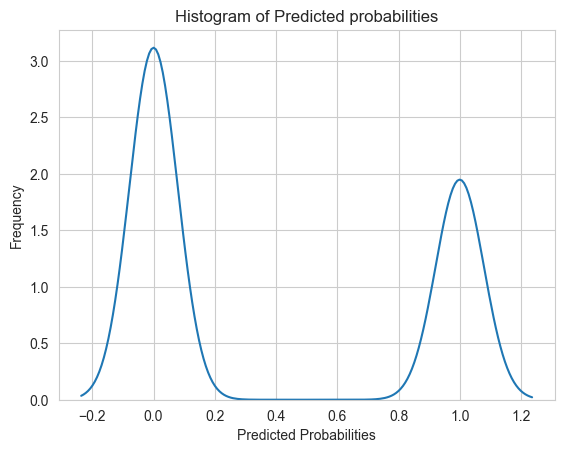

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(y_pred_rf_featured)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/Random Forest featured predictions")
plt.show()

The accuracy of 0.6348 indicates that the model's predictions are correct for approximately 63.5% of the instances in the dataset.

The precision of 0.3193 suggests that out of all instances predicted as positive by the model, only around 31.9% are truly positive.


The recall, also known as sensitivity, of 0.5433 indicates that the model correctly identifies approximately 54.3% of the actual positive instances.

The F1-score of 0.4022 is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance. In this case, the F1-score indicates a moderate overall performance of the model.

The ROC AUC value of 0.6024 represents the area under the Receiver Operating Characteristic (ROC) curve. It measures the model's ability to discriminate between positive and negative instances. A value closer to 1 indicates a better discrimination ability, while a value close to 0.5 suggests limited discrimination in this case.

Overall, the model's performance is moderate, with some room for improvement. It achieves relatively higher accuracy and recall compared to precision and F1-score. It's important to consider the specific requirements and objectives of your problem to determine if these performance metrics are satisfactory or if further optimization is needed.

In [ ]:
# Applying Cross validation to our random forest
featured_cv_score = cross_val_score(featured_rf_classifier, X_featured_train_pca, y_resampled2, cv=50)

# Calculate the average score across all folds
average_accuracy = np.mean(featured_cv_score)

# Print the average accuracy
print("Average accuracy: ", average_accuracy)

Average accuracy:  0.6348675457353291


Even with 50 folds, we still get an accuracy score of 63.49%. 

In [ ]:
# Instantiate the base Random Forest classifier
base_classifier = RandomForestClassifier()

# Create an AdaBoost classifier using the base classifier
boosting_classifier = AdaBoostClassifier(base_classifier, n_estimators=10)

# Fit the boosting classifier on the data
boosting_classifier.fit(X_featured_train_pca, y_resampled2)

# Make predictions using the boosting classifier
predictions = boosting_classifier.predict(X_featured_test_pca)

In [ ]:
# Checking values
print("Prediction Value Counts")
pred_unique_values_Boosted, counts_boosted = np.unique(predictions, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values_Boosted, counts_boosted)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values2, counts2 = np.unique(y_test2, return_counts=True)
for value, count in list(zip(act_unique_values2, counts2)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm_boosted = confusion_matrix(y_test2, predictions)

print("Confusion Matrix")
print(cm_boosted)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0: 5369
1: 3619

Actual Value Counts
0: 6956
1: 2032

Confusion Matrix
[[4493 2463]
 [ 876 1156]]

[[TN  FP]
[FN  TP]]


In [ ]:
# Evaluate All metrics 
evaluator_featured_boosted = ClassificationEvaluator(y_test2, predictions)
metrics_featured_boosted = evaluator_featured_boosted.evaluate()

# print the metrics
for metric, value in metrics_featured_boosted.items():
    print(f"{metric}: {value}")

Accuracy: 0.6285046728971962
Precision: 0.31942525559546836
Recall: 0.5688976377952756
F1-Score: 0.4091311272341179
ROC AUC: 0.6074074157924049


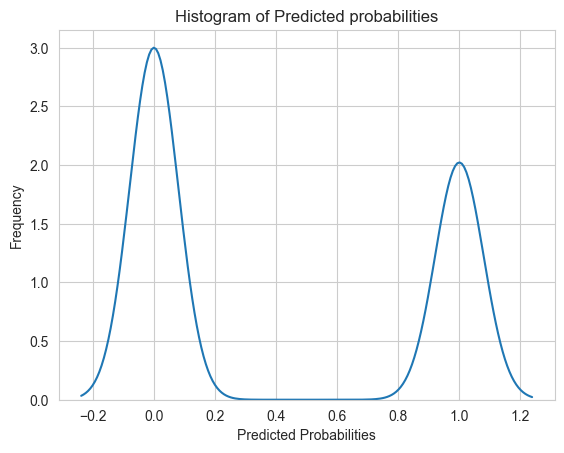

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(predictions)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/Random Forest boosted predictions")
plt.show()

The accuracy indicates the overall correctness of the predictions, which in this case is around 0.63, suggesting that the model performs slightly better than random guessing.

The precision of 0.32 indicates that there is a relatively high rate of false positives, meaning the model incorrectly predicts positive samples. The recall of 0.57 indicates that the model captures a moderate number of true positives, while the F1-score of 0.41 provides a balance between precision and recall.

The ROC AUC of 0.61 measures the model's ability to discriminate between positive and negative samples, with a value closer to 1 indicating better performance. The achieved value suggests that the model has some ability to distinguish between the classes, but there is room for improvement.

In [ ]:
# Instantiate the base Random Forest classifier
base_classifier = RandomForestClassifier()

# Create a Bagging classifier using the base classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10)

# Fit the bagging classifier on the data
bagging_classifier.fit(X_featured_train_pca, y_resampled2)

# Make predictions using the bagging classifier
predictions1 = bagging_classifier.predict(X_featured_test_pca)

In [ ]:
# Checking values
print("Prediction Value Counts")
pred_unique_values_Bagged, counts_bagged = np.unique(predictions1, return_counts=True)
for value, count in [(value, count) for value, count in zip(pred_unique_values_Bagged, counts_bagged)]:
    print(f"{value}: {count}")
print()
# Comparing with original
print("Actual Value Counts")
act_unique_values2, counts2 = np.unique(y_test2, return_counts=True)
for value, count in list(zip(act_unique_values2, counts2)):
    print(f"{value}: {count}")
print()
# Confusion Matrix
cm_bagged = confusion_matrix(y_test2, predictions1)

print("Confusion Matrix")
print(cm_bagged)
print()
print("[[TN  FP]")
print("[FN  TP]]")

Prediction Value Counts
0: 5460
1: 3528

Actual Value Counts
0: 6956
1: 2032

Confusion Matrix
[[4562 2394]
 [ 898 1134]]

[[TN  FP]
[FN  TP]]


In [ ]:
# Evaluate All metrics 
evaluator_featured_bagged = ClassificationEvaluator(y_test2, predictions1)
metrics_featured_bagged = evaluator_featured_bagged.evaluate()

# print the metrics
for metric, value in metrics_featured_bagged.items():
    print(f"{metric}: {value}")

Accuracy: 0.6337338673787272
Precision: 0.32142857142857145
Recall: 0.5580708661417323
F1-Score: 0.4079136690647482
ROC AUC: 0.6069537769466569


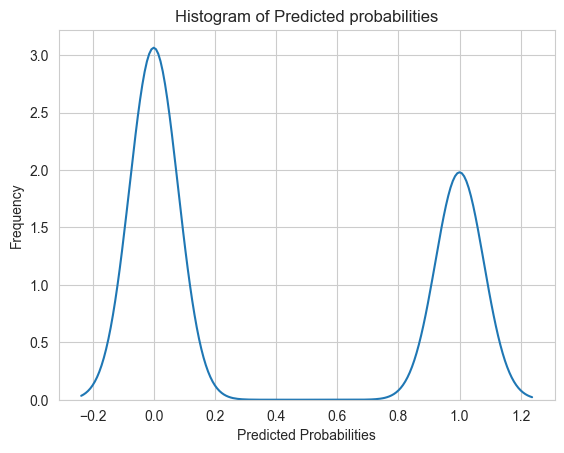

In [ ]:
# Create a histogram of predicted probabilities 
sns.kdeplot(predictions1)
plt.xlabel("Predicted Probabilities")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted probabilities")
plt.savefig("Images/Random Forest Bagged predictions")
plt.show()

These metrics represent the performance of the model across different subsets of the data, as assessed through cross-validation. The accuracy indicates the overall correctness of the predictions, which in this case is around 0.63, suggesting that the model performs slightly better than random guessing.

The precision of 0.32 indicates that there is a relatively high rate of false positives, meaning the model incorrectly predicts positive samples. The recall of 0.56 indicates that the model captures a moderate number of true positives, while the F1-score of 0.41 provides a balance between precision and recall.

The ROC AUC of 0.61 measures the model's ability to discriminate between positive and negative samples, with a value closer to 1 indicating better performance. The achieved value suggests that the model has some ability to distinguish between the classes, but there is room for improvement.

## RESULTS
The results of our credit card default prediction model indicate that the model's performance is subpar. The logistic regression model achieved an accuracy of 77.35%, which means that 77.35% of the instances were classified correctly. However, the precision, recall, and F1-score are relatively low, indicating room for improvement.

The precision of the model is low, suggesting a high rate of false positives. This means that the model incorrectly identifies a significant number of individuals as likely to default on their credit card payments. The recall score is also low, indicating that the model fails to identify a considerable portion of actual positive instances (individuals who will default). The F1-score, which combines precision and recall, further confirms the poor performance of the model.

The ROC AUC score, which measures the model's ability to distinguish between positive and negative instances, is close to 0.5. This indicates that the model has poor discriminatory power and is not effectively capturing the underlying patterns in the data.

### CLASS IMBALANCE INVESTIGATION
We observed a class imbalance in the target variable, with a ratio of 3.52 between the majority class (non-default) and the minority class (default). Class imbalance can have a significant impact on the performance of machine learning models, particularly in classification tasks. Imbalanced classes can lead to biased predictions and a higher tendency to classify instances into the majority class.

## RECOMMENDATIONS
Based on the findings of our credit card default prediction model, we make the following recommendations to improve the model's performance:

Address Class Imbalance: Given the class imbalance in the dataset, it is essential to employ techniques to address this issue. Resampling techniques, such as oversampling the minority class or undersampling the majority class, can help balance the classes and improve the model's ability to learn from both classes equally.

Feature Engineering: Explore additional feature engineering techniques to extract more meaningful information from the available data. This can include creating new features based on domain knowledge, combining existing features, or transforming variables to capture non-linear relationships.

Incorporate Additional Features: Consider incorporating additional relevant features into the model. The current dataset includes information about credit amount, demographics, payment history, bill statements, and previous payment amounts. However, there may be other variables that could provide valuable insights into credit card default prediction. Domain expertise and further research can help identify potential additional features to enhance the model's predictive power.

Advanced Modeling Techniques: Experiment with advanced machine learning algorithms specifically designed for classification tasks, such as ensemble methods (e.g., random forest, gradient boosting) or neural networks. These algorithms have the potential to capture complex relationships in the data and improve the model's performance.

Hyperparameter Tuning: Perform hyperparameter tuning to optimize the parameters of the chosen machine learning algorithms. Adjusting the hyperparameters can significantly impact the model's performance and fine-tune its ability to capture the underlying patterns in the data.

Data Quality and Representativeness: Ensure the dataset used for training the model is of high quality and representative of the target population. This includes thorough data preprocessing, handling missing values appropriately, and addressing any potential biases or data collection issues.

Cross-Validation and Model Evaluation: Implement robust model evaluation techniques, such as k-fold cross-validation, to obtain more reliable performance metrics. This helps assess the model's performance on different subsets of the data and provides a better estimate of its generalization capabilities.

Continuous Monitoring and Model Updating: Credit card default prediction is a dynamic problem influenced by changing economic conditions, customer behaviors, and external factors. It is crucial to continuously monitor the model's performance and update it as new data becomes available. Regular model evaluation and retraining will ensure its effectiveness and relevance over tim